In [1]:
import pkg_resources
installed_packages = [pkg.key for pkg in pkg_resources.working_set]
print(installed_packages)

['certifi', 'pytz', 'pywin32', 'setuptools', 'pyzmq', 'flatbuffers', 'packaging', 'pip', 'libclang', 'pillow', 'ipython', 'jupyter-client', 'ipykernel', 'tornado', 'importlib-metadata', 'importlib-resources', 'psutil', 'traitlets', 'cachetools', 'jupyter-core', 'decorator', 'fonttools', 'rsa', 'typing-extensions', 'protobuf', 'zipp', 'h5py', 'matplotlib', 'markdown', 'idna', 'opt-einsum', 'oauthlib', 'threadpoolctl', 'prompt-toolkit', 'pyparsing', 'charset-normalizer', 'platformdirs', 'requests', 'google-auth', 'pygments', 'tensorboard', 'keras', 'tensorflow-cpu', 'tensorflow-estimator', 'tensorflow-intel', 'python-dateutil', 'werkzeug', 'asttokens', 'termcolor', 'markupsafe', 'grpcio', 'urllib3', 'numpy', 'six', 'wrapt', 'scipy', 'tensorboard-plugin-wit', 'debugpy', 'astunparse', 'nest-asyncio', 'pandas', 'kiwisolver', 'absl-py', 'requests-oauthlib', 'scikit-learn', 'executing', 'joblib', 'keras-preprocessing', 'contourpy', 'wheel', 'tensorflow-io-gcs-filesystem', 'jedi', 'seaborn', '

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import time
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer

## opening the data

In [3]:
data = pd.read_csv('hisotryWithRollingAverages.csv')

In [4]:
data.head()

,Unnamed: 0,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Weather Type,Conditions,temp_c,Month,Year,Temperature_Lag1,Temperature_Lag2,Precipitation_Lag1,Precipitation_Lag2,temp_7d_rolling
0,0,2023-02-01 00:00:00,50.9,50.9,50.9,49.1,93.53,NaN,7.0,NaN,...,Thunderstorm,Overcast,10.500000,2,2023,NaN,NaN,NaN,NaN,NaN
1,1,2023-02-01 01:00:00,44.0,44.0,44.0,39.5,84.07,NaN,13.0,NaN,...,Thunderstorm,Overcast,6.666667,2,2023,50.9,NaN,0.0,NaN,NaN
2,2,2023-02-01 02:00:00,44.7,44.7,44.7,39.9,82.97,NaN,10.1,NaN,...,"Mist, Rain, Thunderstorm",Overcast,7.055556,2,2023,44.0,50.9,0.0,0.0,NaN
3,3,2023-02-01 03:00:00,44.7,44.7,44.7,39.9,82.95,NaN,14.3,NaN,...,"Thunderstorm, Light Rain",Overcast,7.055556,2,2023,44.7,44.0,0.0,0.0,NaN
4,4,2023-02-01 04:00:00,44.7,44.7,44.7,39.9,82.97,NaN,9.8,NaN,...,"Rain, Thunderstorm",Overcast,7.055556,2,2023,44.7,44.7,0.0,0.0,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439918 entries, 0 to 439917
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           439918 non-null  int64  
 1   Date time            439918 non-null  object 
 2   Minimum Temperature  421821 non-null  float64
 3   Maximum Temperature  421821 non-null  float64
 4   Temperature          421821 non-null  float64
 5   Dew Point            421543 non-null  float64
 6   Relative Humidity    421543 non-null  float64
 7   Heat Index           60366 non-null   float64
 8   Wind Speed           421543 non-null  float64
 9   Wind Gust            1026 non-null    float64
 10  Wind Direction       397295 non-null  float64
 11  Wind Chill           40460 non-null   float64
 12  Precipitation        439918 non-null  float64
 13  Snow Depth           196268 non-null  float64
 14  Visibility           421334 non-null  float64
 15  Cloud Cover      

## sampling data for testing

In [31]:
test = data.head(1000).copy()
test

,Unnamed: 0,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Weather Type,Conditions,temp_c,Month,Year,Temperature_Lag1,Temperature_Lag2,Precipitation_Lag1,Precipitation_Lag2,temp_7d_rolling
0,0,2023-02-01 00:00:00,50.9,50.9,50.9,49.1,93.53,NaN,7.0,NaN,...,Thunderstorm,Overcast,10.500000,2,2023,NaN,NaN,NaN,NaN,NaN
1,1,2023-02-01 01:00:00,44.0,44.0,44.0,39.5,84.07,NaN,13.0,NaN,...,Thunderstorm,Overcast,6.666667,2,2023,50.9,NaN,0.0,NaN,NaN
2,2,2023-02-01 02:00:00,44.7,44.7,44.7,39.9,82.97,NaN,10.1,NaN,...,"Mist, Rain, Thunderstorm",Overcast,7.055556,2,2023,44.0,50.9,0.0,0.0,NaN
3,3,2023-02-01 03:00:00,44.7,44.7,44.7,39.9,82.95,NaN,14.3,NaN,...,"Thunderstorm, Light Rain",Overcast,7.055556,2,2023,44.7,44.0,0.0,0.0,NaN
4,4,2023-02-01 04:00:00,44.7,44.7,44.7,39.9,82.97,NaN,9.8,NaN,...,"Rain, Thunderstorm",Overcast,7.055556,2,2023,44.7,44.7,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81,2022-12-28 09:00:00,51.0,51.0,51.0,42.9,73.70,NaN,2.7,NaN,...,Mist,Clear,10.555556,12,2022,49.4,45.6,0.0,0.0,50.461905
996,82,2022-12-28 10:00:00,52.1,52.1,52.1,41.7,67.45,NaN,2.3,NaN,...,NaN,Clear,11.166667,12,2022,51.0,49.4,0.0,0.0,50.372024
997,83,2022-12-28 11:00:00,53.9,53.9,53.9,43.1,66.72,NaN,4.7,NaN,...,Smoke Or Haze,Clear,12.166667,12,2022,52.1,51.0,0.0,0.0,50.247619
998,84,2022-12-28 12:00:00,53.9,53.9,53.9,44.3,69.96,NaN,2.9,NaN,...,NaN,Partially cloudy,12.166667,12,2022,53.9,52.1,0.0,0.0,50.163095


In [32]:
Conditions_one_hot = pd.get_dummies(test.Conditions)
Conditions_one_hot

,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy"
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
995,1,0,0,0,0,0
996,1,0,0,0,0,0
997,1,0,0,0,0,0
998,0,0,1,0,0,0


### testing basic network

In [8]:
x_vectors = test.drop('Conditions', axis=1)

In [9]:
weather_type = pd.get_dummies(x_vectors['Weather Type'])
weather_type

,Drizzle,"Drizzle, Rain","Drizzle, Smoke Or Haze","Drizzle, Thunderstorm Without Precipitation",Hail Showers,"Hail Showers, Rain, Light Rain",Heavy Drizzle/Rain,"Heavy Rain, Sky Coverage Increasing",Light Drizzle,"Light Drizzle, Light Rain",...,"Thunderstorm Without Precipitation, Rain Showers, Heavy Rain","Thunderstorm, Heavy Rain, Light Rain","Thunderstorm, Light Drizzle/Rain","Thunderstorm, Light Rain","Thunderstorm, Light Rain, Smoke Or Haze","Thunderstorm, Rain","Thunderstorm, Rain Showers","Thunderstorm, Rain, Light Rain","Thunderstorm, Rain, Thunderstorm Without Precipitation","Thunderstorm, Smoke Or Haze"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def generateModelPerLayerNumber(numberOfLayers, numberOfFeatures, outdim=6):
    """
    generates a model with numOfLayers layers, with the first layer with 512 dimensions, and the last layer with 10, and the 
    rest are equally spread in between linearly. for example 5 layers will be 512, 387, 262, 137, 10
    """
    stardim = numberOffeatures - 5
    model = Sequential()
    diff = (startdim - outdim) // (numberOfLayers - 1) # difference between each dimension
    
    model.add(Dense(numberOfFeatures-5, input_shape=(numberOfFeatures,), activation='relu'))
    
    for i in range (1, numberOfLayers - 1):
        model.add(Dense(512 - diff * i, 'relu'))
    
    model.add(Dense(outdim, activation='sigmoid'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [11]:
model = generateModelPerLayerNumber(3,79)

In [12]:
model.fit(weather_type, Conditions_one_hot, validation_split=0.2, epochs=10, verbose=1)

Epoch 1/10
25/25 [==============================] - 1s 20ms/step - loss: 0.1725 - accuracy: 0.4112 - val_loss: 0.1152 - val_accuracy: 0.3700
Epoch 2/10
25/25 [==============================] - 0s 13ms/step - loss: 0.0993 - accuracy: 0.5337 - val_loss: 0.1152 - val_accuracy: 0.2650
Epoch 3/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0932 - accuracy: 0.5263 - val_loss: 0.1257 - val_accuracy: 0.2600
Epoch 4/10
25/25 [==============================] - 0s 13ms/step - loss: 0.0870 - accuracy: 0.5725 - val_loss: 0.1297 - val_accuracy: 0.2450
Epoch 5/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0844 - accuracy: 0.6062 - val_loss: 0.1188 - val_accuracy: 0.2600
Epoch 6/10
25/25 [==============================] - 0s 15ms/step - loss: 0.0829 - accuracy: 0.6100 - val_loss: 0.1165 - val_accuracy: 0.3700
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0831 - accuracy: 0.5987 - val_loss: 0.1165 - val_accuracy: 0.3650
Epoch 8/10
25

## creating full model

In [33]:
labels = tf.convert_to_tensor(Conditions_one_hot, dtype = tf.float64)

fixing the date time objects

In [34]:
test['Date time'] = pd.to_datetime(test['Date time'])
test['Date time'] = test['Date time'].apply(lambda x: x.timestamp())
test['Date time']

0      1.675210e+09
1      1.675213e+09
2      1.675217e+09
3      1.675220e+09
4      1.675224e+09
           ...     
995    1.672218e+09
996    1.672222e+09
997    1.672225e+09
998    1.672229e+09
999    1.672232e+09
Name: Date time, Length: 1000, dtype: float64

fixing the Weather Type object

In [35]:
test['Weather Type']

0                  Thunderstorm
1                  Thunderstorm
2      Mist, Rain, Thunderstorm
3      Thunderstorm, Light Rain
4            Rain, Thunderstorm
                 ...           
995                        Mist
996                         NaN
997               Smoke Or Haze
998                         NaN
999                         NaN
Name: Weather Type, Length: 1000, dtype: object

In [36]:
test['Weather Type'] = test['Weather Type'].str.split(',')
test['Weather Type']

0                    [Thunderstorm]
1                    [Thunderstorm]
2      [Mist,  Rain,  Thunderstorm]
3       [Thunderstorm,  Light Rain]
4             [Rain,  Thunderstorm]
                   ...             
995                          [Mist]
996                             NaN
997                 [Smoke Or Haze]
998                             NaN
999                             NaN
Name: Weather Type, Length: 1000, dtype: object

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   Date time            1000 non-null   float64
 2   Minimum Temperature  1000 non-null   float64
 3   Maximum Temperature  1000 non-null   float64
 4   Temperature          1000 non-null   float64
 5   Dew Point            1000 non-null   float64
 6   Relative Humidity    1000 non-null   float64
 7   Heat Index           0 non-null      float64
 8   Wind Speed           1000 non-null   float64
 9   Wind Gust            16 non-null     float64
 10  Wind Direction       980 non-null    float64
 11  Wind Chill           447 non-null    float64
 12  Precipitation        1000 non-null   float64
 13  Snow Depth           0 non-null      float64
 14  Visibility           1000 non-null   float64
 15  Cloud Cover          980 non-null    fl

In [38]:
a = test['Weather Type'].to_frame()
type(a['Weather Type'][1])

list

In [39]:
df = test['Weather Type'].to_frame()
df['Weather Type'] = df['Weather Type'].apply(lambda d: d if isinstance(d, list) else [])
mlb = MultiLabelBinarizer()
df_transformed = pd.DataFrame(mlb.fit_transform(df['Weather Type']), columns=mlb.classes_, index=df.index)
df_transformed.columns

Index([' Fog', ' Heavy Drizzle/Rain', ' Heavy Rain', ' Light Drizzle',
       ' Light Drizzle/Rain', ' Light Freezing Rain', ' Light Rain', ' Mist',
       ' Rain', ' Rain Showers', ' Sky Coverage Decreasing',
       ' Sky Coverage Increasing', ' Sky Unchanged', ' Smoke Or Haze', ' Snow',
       ' Thunderstorm', ' Thunderstorm Without Precipitation', 'Drizzle',
       'Hail Showers', 'Heavy Drizzle/Rain', 'Heavy Rain', 'Light Drizzle',
       'Light Drizzle/Rain', 'Light Rain', 'Lightning Without Thunder', 'Mist',
       'Rain', 'Rain Showers', 'Sky Coverage Decreasing',
       'Sky Coverage Increasing', 'Smoke Or Haze', 'Snow And Rain Showers',
       'Thunderstorm', 'Thunderstorm Without Precipitation'],
      dtype='object')

In [42]:
df_transformed

,Fog,Heavy Drizzle/Rain,Heavy Rain,Light Drizzle,Light Drizzle/Rain,Light Freezing Rain,Light Rain,Mist,Rain,Rain Showers,...,Lightning Without Thunder,Mist,Rain,Rain Showers,Sky Coverage Decreasing,Sky Coverage Increasing,Smoke Or Haze,Snow And Rain Showers,Thunderstorm,Thunderstorm Without Precipitation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x_vector = pd.concat((test.drop(['Weather Type', 'Conditions'], axis=1),df_transformed), axis=1)
x_vector

,Unnamed: 0,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Lightning Without Thunder,Mist,Rain,Rain Showers,Sky Coverage Decreasing,Sky Coverage Increasing,Smoke Or Haze,Snow And Rain Showers,Thunderstorm,Thunderstorm Without Precipitation
0,0,1.675210e+09,50.9,50.9,50.9,49.1,93.53,NaN,7.0,NaN,...,0,0,0,0,0,0,0,0,1,0
1,1,1.675213e+09,44.0,44.0,44.0,39.5,84.07,NaN,13.0,NaN,...,0,0,0,0,0,0,0,0,1,0
2,2,1.675217e+09,44.7,44.7,44.7,39.9,82.97,NaN,10.1,NaN,...,0,1,0,0,0,0,0,0,0,0
3,3,1.675220e+09,44.7,44.7,44.7,39.9,82.95,NaN,14.3,NaN,...,0,0,0,0,0,0,0,0,1,0
4,4,1.675224e+09,44.7,44.7,44.7,39.9,82.97,NaN,9.8,NaN,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81,1.672218e+09,51.0,51.0,51.0,42.9,73.70,NaN,2.7,NaN,...,0,1,0,0,0,0,0,0,0,0
996,82,1.672222e+09,52.1,52.1,52.1,41.7,67.45,NaN,2.3,NaN,...,0,0,0,0,0,0,0,0,0,0
997,83,1.672225e+09,53.9,53.9,53.9,43.1,66.72,NaN,4.7,NaN,...,0,0,0,0,0,0,1,0,0,0
998,84,1.672229e+09,53.9,53.9,53.9,44.3,69.96,NaN,2.9,NaN,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x_vector = tf.convert_to_tensor(x_vector, dtype = tf.float64)

In [53]:
numberOfFeatures = x_vector.shape[1]
numberOfFeatures

59

In [54]:
model2 = generateModelPerLayerNumber(3, numberOfFeatures)
model2.fit(x_vector, labels, validation_split=0.2, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 18ms/step - loss: 0.2481 - accuracy: 0.4663 - val_loss: 0.2465 - val_accuracy: 0.0800
Epoch 2/10
25/25 [==============================] - 0s 12ms/step - loss: 0.2441 - accuracy: 0.4663 - val_loss: 0.2429 - val_accuracy: 0.0800
Epoch 3/10
25/25 [==============================] - 0s 12ms/step - loss: 0.2402 - accuracy: 0.4663 - val_loss: 0.2393 - val_accuracy: 0.0800
Epoch 4/10
25/25 [==============================] - 0s 13ms/step - loss: 0.2364 - accuracy: 0.4663 - val_loss: 0.2357 - val_accuracy: 0.0800
Epoch 5/10
25/25 [==============================] - 0s 12ms/step - loss: 0.2327 - accuracy: 0.4663 - val_loss: 0.2324 - val_accuracy: 0.0800
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.2291 - accuracy: 0.4663 - val_loss: 0.2291 - val_accuracy: 0.0800
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.2255 - accuracy: 0.4663 - val_loss: 0.2260 - val_accuracy: 0.0800
Epoch 8/10
25

# testing different number model configurations.

In [68]:
def dynamicTrainModel(trainData, trainLabels, epochs, batchSize, model):
    imagesDf = model.fit(
        trainData, trainLabels, 
        validation_data = None,
        epochs = epochs,
        batch_size = batchSize,
        verbose = 1)
    return imagesDf.history, model

In [75]:
def testModel(fitData, title = "accuracy and loss per epoch"):
    fig, ax = plt.subplots(figsize = (6, 9))
    lossLine = ax.plot(fitData['loss'], label = 'loss', color = 'red')
    ax.set_ylabel('loss')
    ax2 = ax.twinx()
    accuracyLine = ax2.plot(fitData['accuracy'], label = 'accuracy', color = 'blue')
    ax2.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    
    lines = lossLine + accuracyLine

    ax.legend(lines, [line.get_label() for line in lines], loc = ("upper center"))
    plt.title(title)
    
    plt.show()

In [73]:
def trainModels(numberOfLayersToTest, epochsToTest, batchSizesToTest, trainData, trainLabels):
    fitModels = dict()
    histories = dict()
    for numberOfLayers in numberOfLayersToTest:
        for epochs in epochsToTest:
            for batchSize in batchSizesToTest:
                model = generateModelPerLayerNumber(numberOfLayers, trainData.shape[1])
                history, fitModel = dynamicTrainModel(trainData, trainLabels, epochs, batchSize, model)
                key = f'numberOfLayers is {numberOfLayers}. epochs is {epochs}. batchSize is {batchSize}'
                testModel(history, f'accuracy vs loss, {numberOfLayers} layers, {epochs} epochs, {batchSize} batchSize')
                fitModels[key] = fitModel
                histories[key] = history
    return histories, fitModels

Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.2484 - accuracy: 0.4770
Epoch 2/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2420 - accuracy: 0.4750
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2389 - accuracy: 0.4750
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/10
20/20 [==============================] - 0s 10ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/10
20/20 [==============================] - 0s 10ms/step - loss: 0.2216 - accuracy: 0.4750


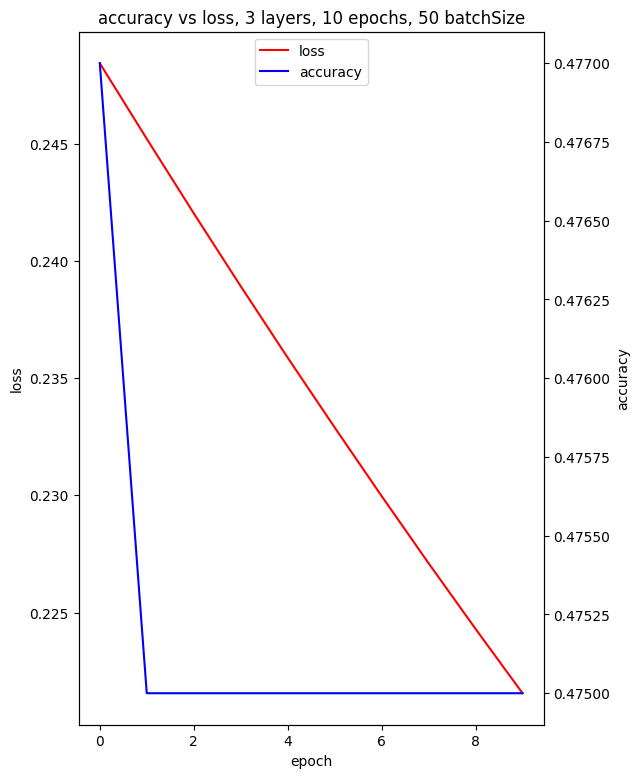

Epoch 1/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2493 - accuracy: 0.4680
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/10
10/10 [==============================] - 0s 11ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2351 - accuracy: 0.4750


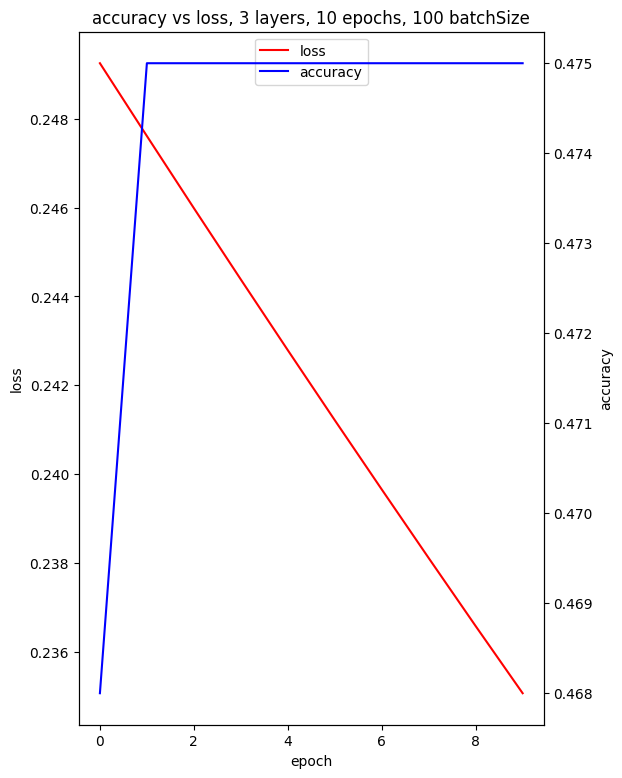

Epoch 1/10
7/7 [==============================] - 1s 14ms/step - loss: 0.2495 - accuracy: 0.4640
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2394 - accuracy: 0.4750


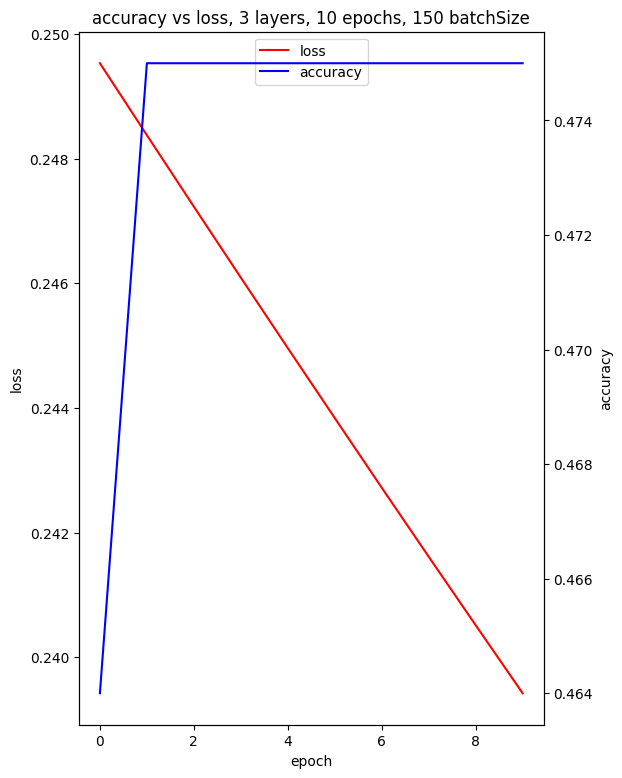

Epoch 1/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2485 - accuracy: 0.4610
Epoch 2/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2453 - accuracy: 0.4750
Epoch 3/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2272 - accuracy: 0.4750
Epoch 9/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/20
20/20 [==============================] - 0s 9ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/20
20/20 [

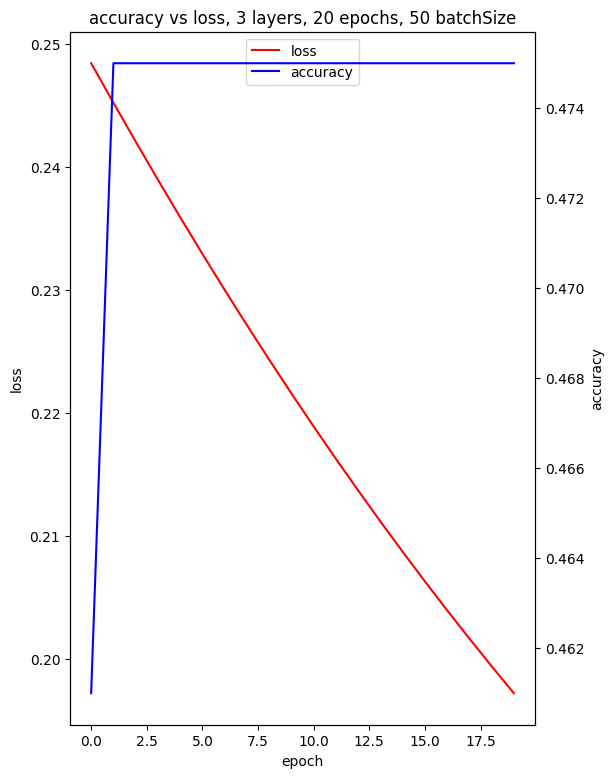

Epoch 1/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2493 - accuracy: 0.4610
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2396 - accuracy: 0.4750
Epoch 8/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/20
10/10 [==============================] - 0s 9ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/2

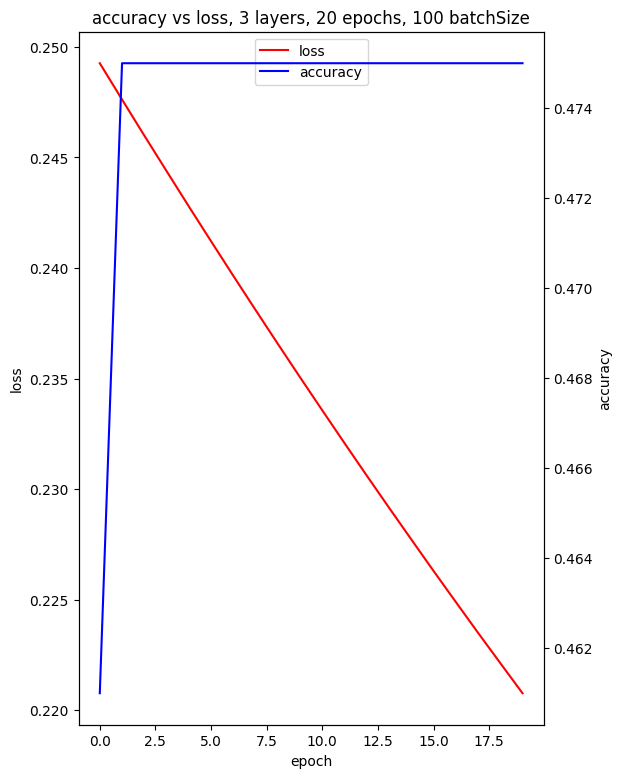

Epoch 1/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2495 - accuracy: 0.4500
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2473 - accuracy: 0.4750
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2439 - accuracy: 0.4750
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/20
7/7 [==============================] - 0s 10ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/20
7/7 [============

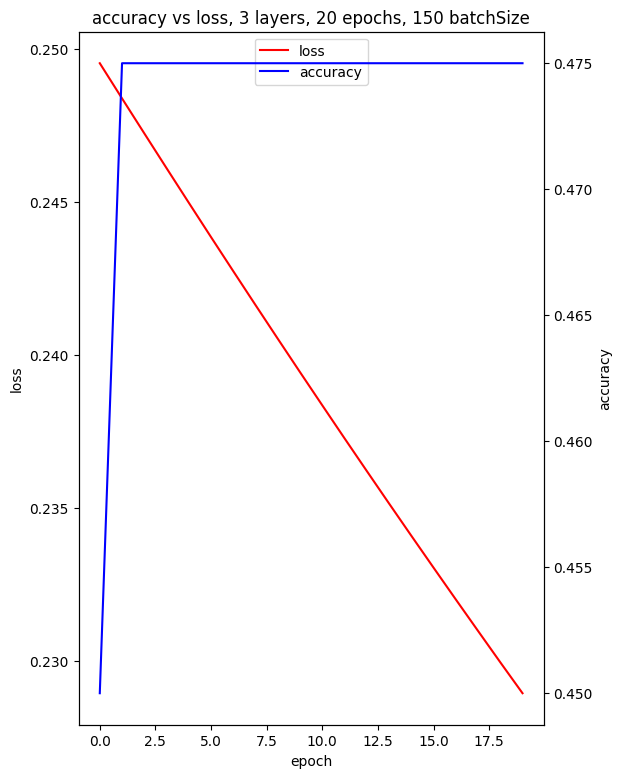

Epoch 1/30
20/20 [==============================] - 1s 10ms/step - loss: 0.2485 - accuracy: 0.4600
Epoch 2/30
20/20 [==============================] - 0s 10ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/30
20/20 [==============================] - 0s 10ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/30
20/20 [==============================] - 0s 10ms/step - loss: 0.2389 - accuracy: 0.4750
Epoch 5/30
20/20 [==============================] - 0s 10ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/30
20/20 [==============================] - 0s 9ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/30
20/20 [==============================] - 0s 9ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/30
20/20 [==============================] - 0s 9ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/30
20/20 [==============================] - 0s 10ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/30
20/20 [==============================] - 0s 10ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/30


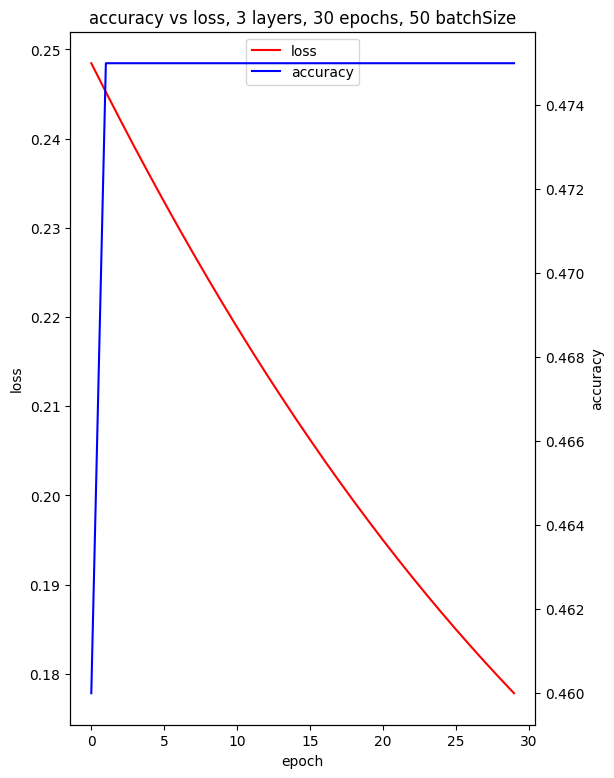

Epoch 1/30
10/10 [==============================] - 0s 11ms/step - loss: 0.2493 - accuracy: 0.4640
Epoch 2/30
10/10 [==============================] - 0s 10ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/30
10/10 [==============================] - 0s 11ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/30
10/10 [==============================] - 0s 12ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/30
10/10 [==============================] - 0s 10ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/30
10/10 [==============================] - 0s 10ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/30
10/10 [==============================] - 0s 10ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/30
10/10 [==============================] - 0s 10ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/30
10/10 [==============================] - 0s 10ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/30
10/10 [==============================] - 0s 10ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

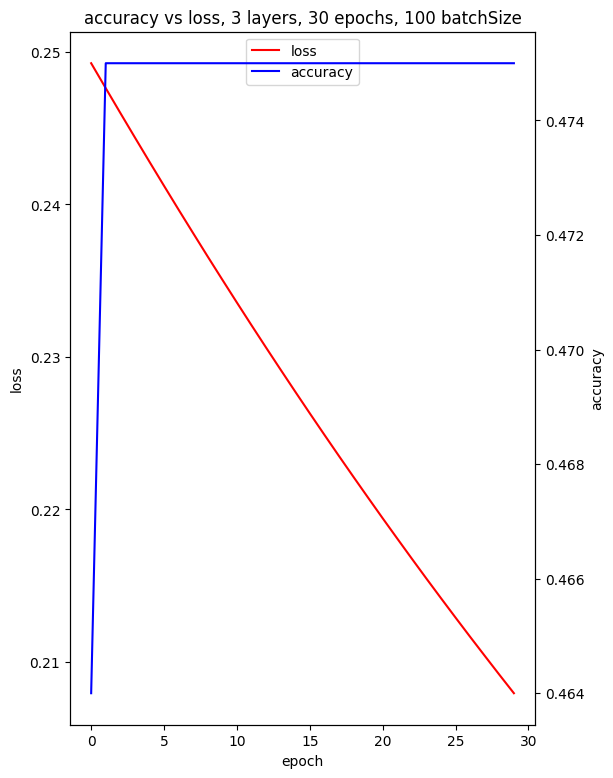

Epoch 1/30
7/7 [==============================] - 0s 13ms/step - loss: 0.2495 - accuracy: 0.4600
Epoch 2/30
7/7 [==============================] - 0s 12ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/30
7/7 [==============================] - 0s 11ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/30
7/7 [==============================] - 0s 11ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/30
7/7 [==============================] - 0s 11ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/30
7/7 [==============================] - 0s 11ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/30
7/7 [==============================] - 0s 11ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/30
7/7 [==============================] - 0s 11ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/30
7/7 [==============================] - 0s 11ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/30
7/7 [==============================] - 0s 11ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/30
7/7 [============

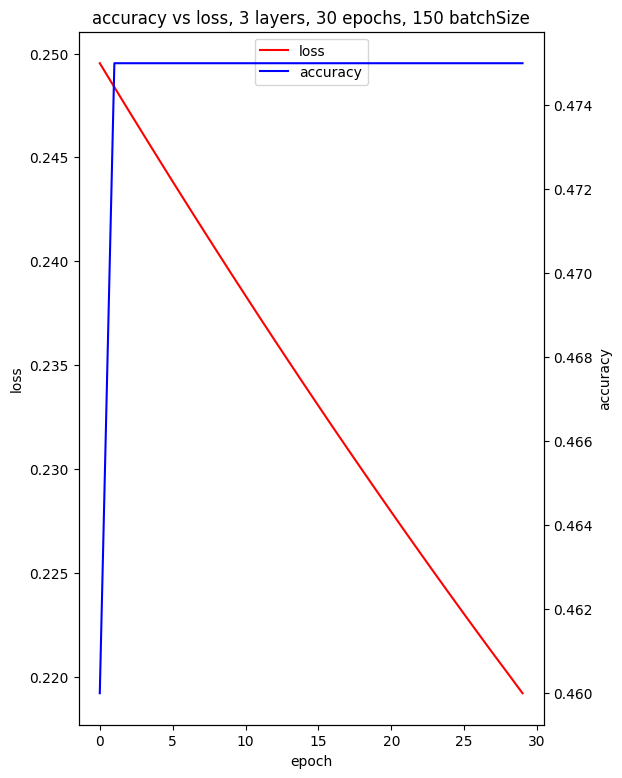

Epoch 1/10
20/20 [==============================] - 1s 11ms/step - loss: 0.2484 - accuracy: 0.4430
Epoch 2/10
20/20 [==============================] - 0s 11ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/10
20/20 [==============================] - 0s 10ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/10
20/20 [==============================] - 0s 11ms/step - loss: 0.2389 - accuracy: 0.4750
Epoch 5/10
20/20 [==============================] - 0s 11ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/10
20/20 [==============================] - 0s 11ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/10
20/20 [==============================] - 0s 11ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/10
20/20 [==============================] - 0s 11ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/10
20/20 [==============================] - 0s 11ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/10
20/20 [==============================] - 0s 12ms/step - loss: 0.2216 - accuracy: 0.4750


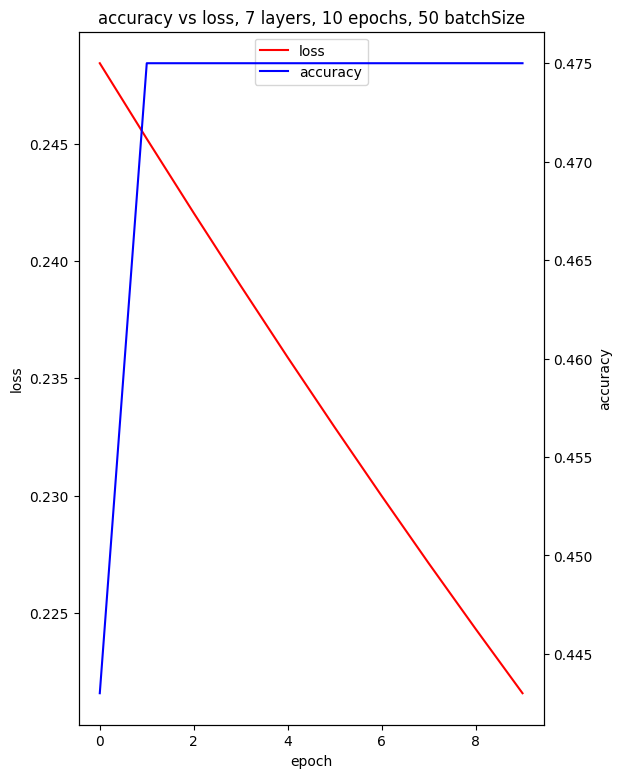

Epoch 1/10
10/10 [==============================] - 1s 13ms/step - loss: 0.2493 - accuracy: 0.4560
Epoch 2/10
10/10 [==============================] - 0s 12ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/10
10/10 [==============================] - 0s 12ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/10
10/10 [==============================] - 0s 12ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/10
10/10 [==============================] - 0s 12ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/10
10/10 [==============================] - 0s 12ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/10
10/10 [==============================] - 0s 12ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/10
10/10 [==============================] - 0s 14ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/10
10/10 [==============================] - 0s 12ms/step - loss: 0.2351 - accuracy: 0.4750


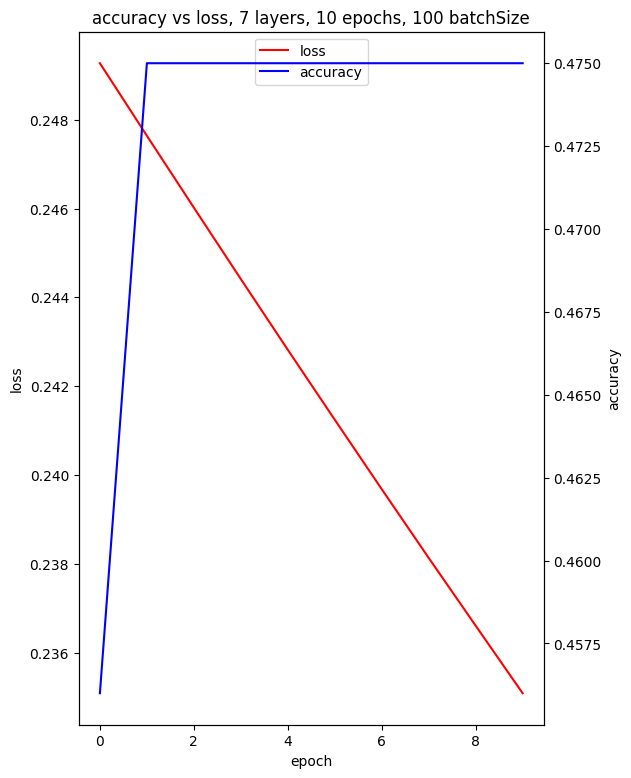

Epoch 1/10
7/7 [==============================] - 1s 13ms/step - loss: 0.2495 - accuracy: 0.4570
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/10
7/7 [==============================] - 0s 17ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/10
7/7 [==============================] - 0s 16ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/10
7/7 [==============================] - 0s 21ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/10
7/7 [==============================] - 0s 17ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2394 - accuracy: 0.4750


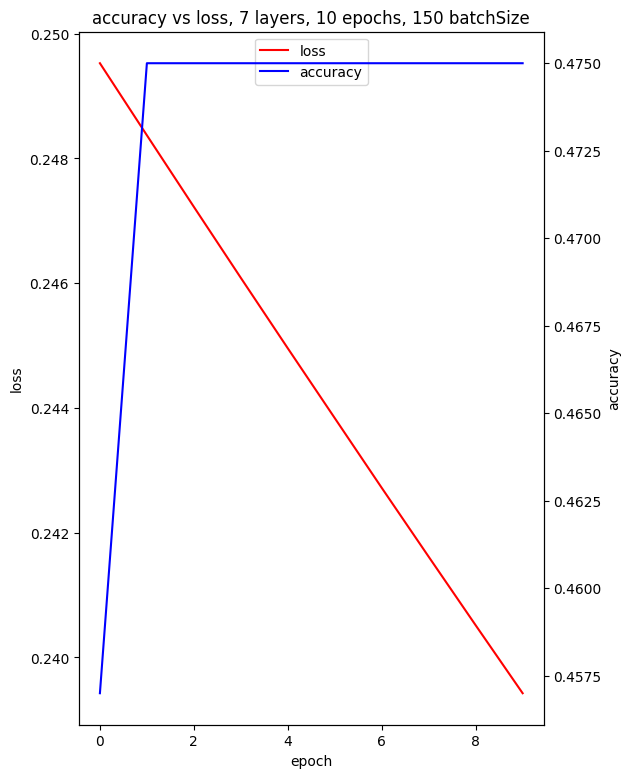

Epoch 1/20
20/20 [==============================] - 1s 13ms/step - loss: 0.2484 - accuracy: 0.4670
Epoch 2/20
20/20 [==============================] - 0s 11ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/20
20/20 [==============================] - 0s 11ms/step - loss: 0.2420 - accuracy: 0.4750
Epoch 4/20
20/20 [==============================] - 0s 11ms/step - loss: 0.2389 - accuracy: 0.4750
Epoch 5/20
20/20 [==============================] - 0s 11ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/20
20/20 [==============================] - 0s 12ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/20
20/20 [==============================] - 0s 12ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/20
20/20 [==============================] - 0s 11ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/20
20/20 [==============================] - 0s 11ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/20
20/20 [==============================] - 0s 11ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/

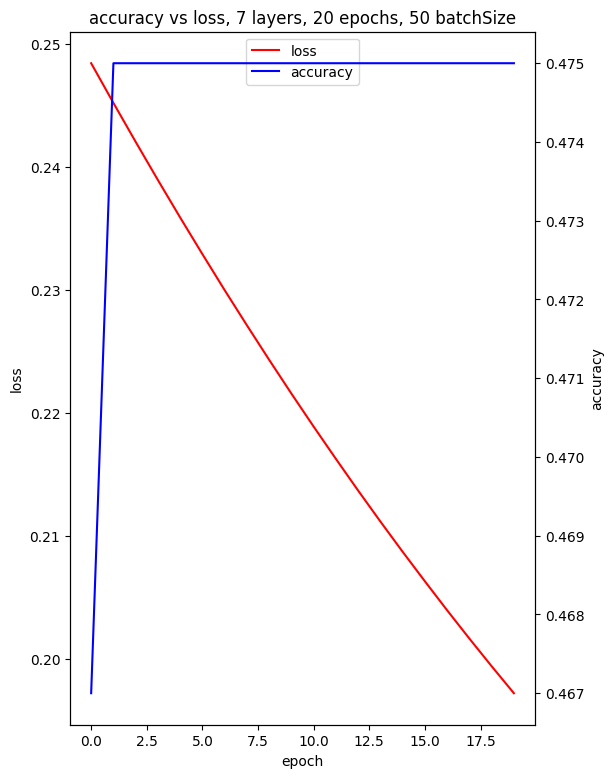

Epoch 1/20
10/10 [==============================] - 1s 13ms/step - loss: 0.2493 - accuracy: 0.4410
Epoch 2/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/20
10/10 [==============================] - 0s 11ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/20
10/10 [==============================] - 0s 11ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

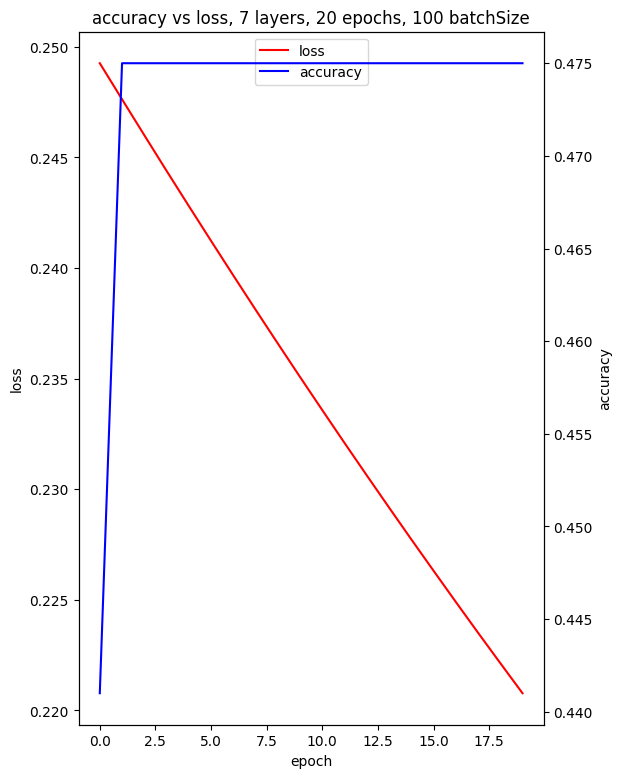

Epoch 1/20
7/7 [==============================] - 1s 15ms/step - loss: 0.2495 - accuracy: 0.4630
Epoch 2/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/20
7/7 [============

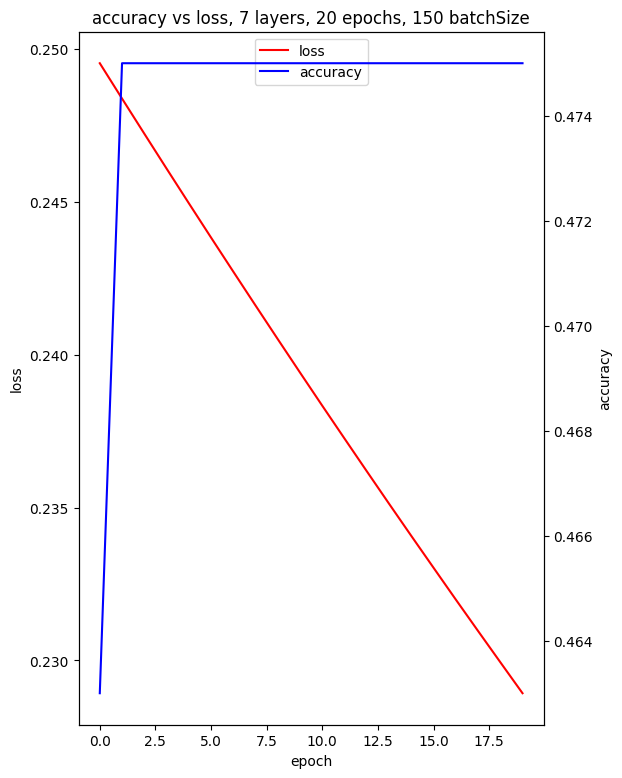

Epoch 1/30
20/20 [==============================] - 1s 13ms/step - loss: 0.2484 - accuracy: 0.4700
Epoch 2/30
20/20 [==============================] - 0s 12ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/30
20/20 [==============================] - 0s 12ms/step - loss: 0.2420 - accuracy: 0.4750
Epoch 4/30
20/20 [==============================] - 0s 12ms/step - loss: 0.2389 - accuracy: 0.4750
Epoch 5/30
20/20 [==============================] - 0s 12ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/30
20/20 [==============================] - 0s 12ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/30
20/20 [==============================] - 0s 11ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/30
20/20 [==============================] - 0s 12ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/30
20/20 [==============================] - 0s 13ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/30
20/20 [==============================] - 0s 12ms/step - loss: 0.2215 - accuracy: 0.4750
Epoch 11/

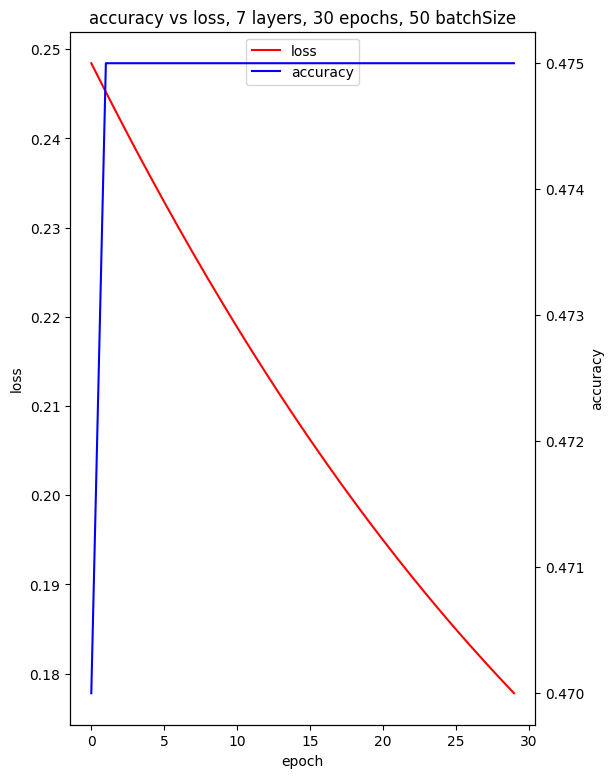

Epoch 1/30
10/10 [==============================] - 1s 12ms/step - loss: 0.2493 - accuracy: 0.4580
Epoch 2/30
10/10 [==============================] - 0s 12ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/30
10/10 [==============================] - 0s 12ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/30
10/10 [==============================] - 0s 12ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/30
10/10 [==============================] - 0s 12ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/30
10/10 [==============================] - 0s 12ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/30
10/10 [==============================] - 0s 12ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/30
10/10 [==============================] - 0s 11ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/30
10/10 [==============================] - 0s 11ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/30
10/10 [==============================] - 0s 12ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

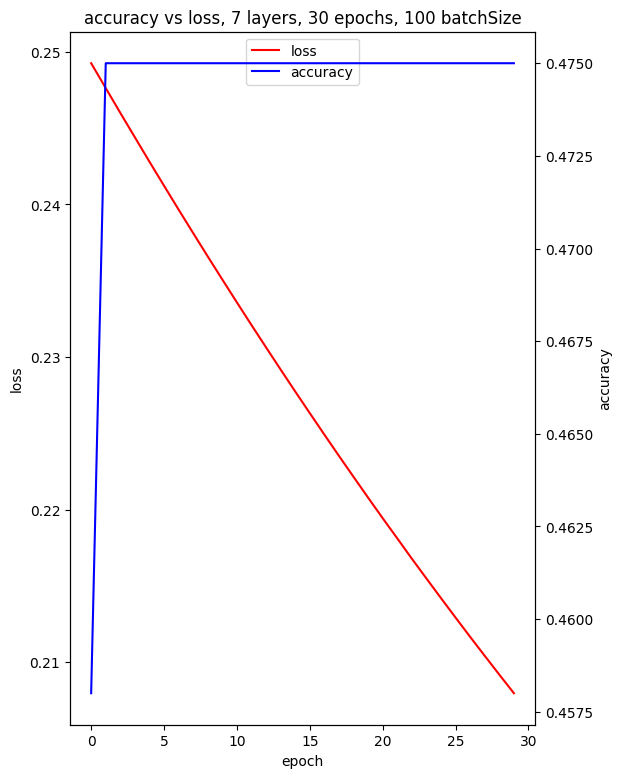

Epoch 1/30
7/7 [==============================] - 1s 15ms/step - loss: 0.2495 - accuracy: 0.4630
Epoch 2/30
7/7 [==============================] - 0s 13ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/30
7/7 [==============================] - 0s 14ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/30
7/7 [==============================] - 0s 14ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/30
7/7 [==============================] - 0s 13ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/30
7/7 [==============================] - 0s 13ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/30
7/7 [==============================] - 0s 13ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/30
7/7 [==============================] - 0s 14ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/30
7/7 [==============================] - 0s 13ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/30
7/7 [==============================] - 0s 13ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/30
7/7 [============

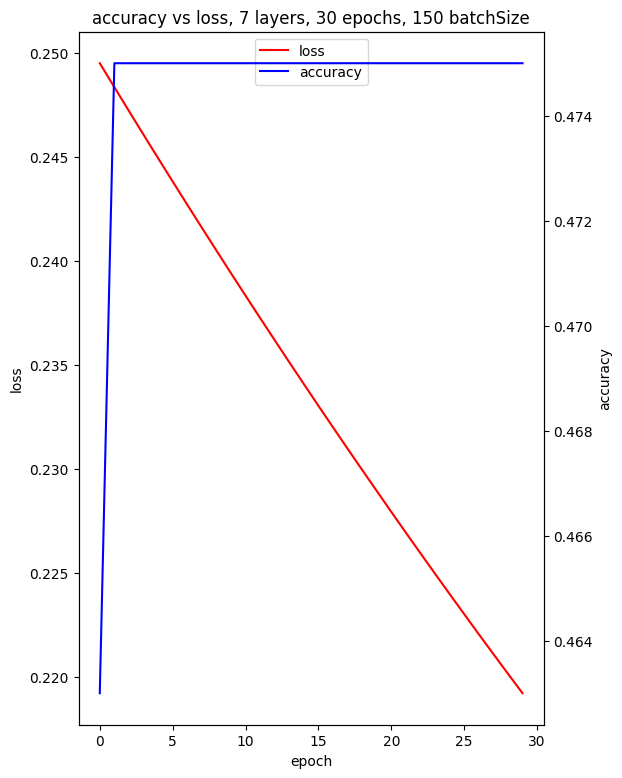

Epoch 1/10
20/20 [==============================] - 1s 15ms/step - loss: 0.2485 - accuracy: 0.4650
Epoch 2/10
20/20 [==============================] - 0s 12ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/10
20/20 [==============================] - 0s 13ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/10
20/20 [==============================] - 0s 13ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/10
20/20 [==============================] - 0s 13ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/10
20/20 [==============================] - 0s 12ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/10
20/20 [==============================] - 0s 13ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/10
20/20 [==============================] - 0s 13ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/10
20/20 [==============================] - 0s 13ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/10
20/20 [==============================] - 0s 13ms/step - loss: 0.2216 - accuracy: 0.4750


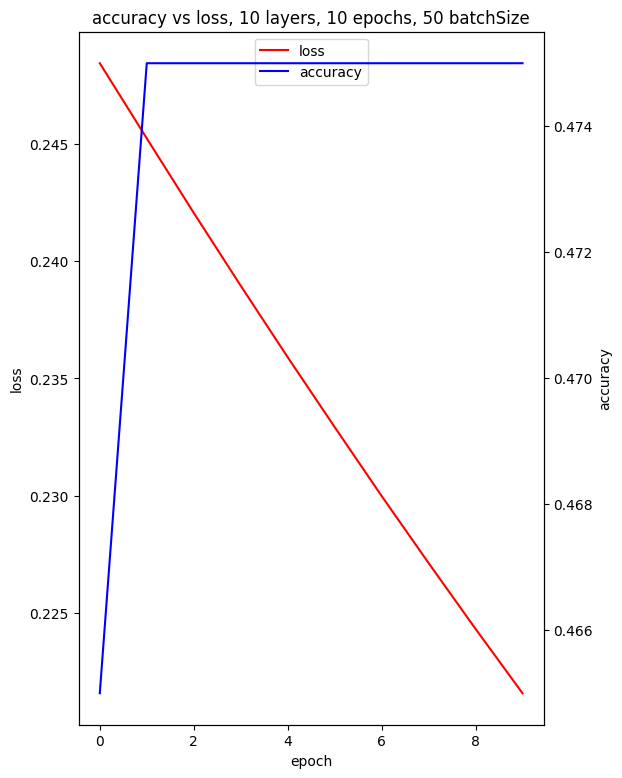

Epoch 1/10
10/10 [==============================] - 1s 14ms/step - loss: 0.2493 - accuracy: 0.4650
Epoch 2/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/10
10/10 [==============================] - 0s 14ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/10
10/10 [==============================] - 0s 14ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2351 - accuracy: 0.4750


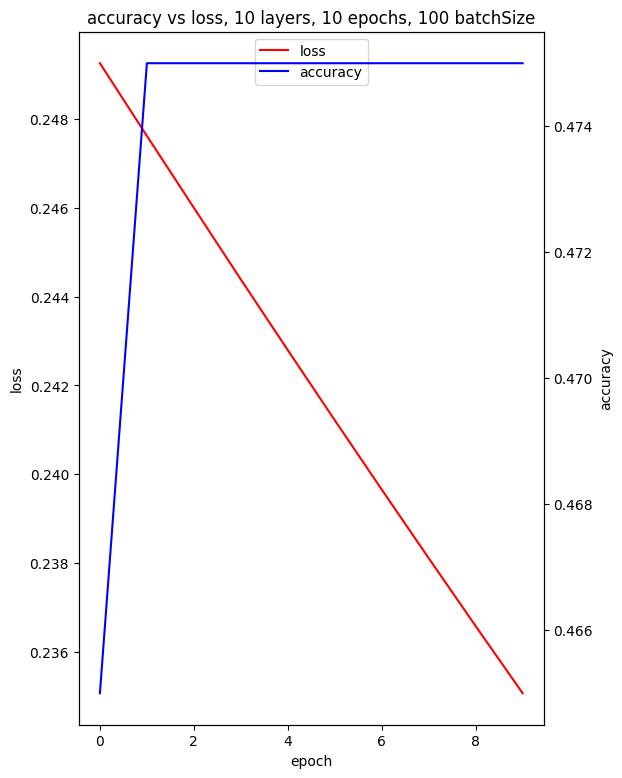

Epoch 1/10
7/7 [==============================] - 1s 17ms/step - loss: 0.2495 - accuracy: 0.3900
Epoch 2/10
7/7 [==============================] - 0s 16ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/10
7/7 [==============================] - 0s 16ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2394 - accuracy: 0.4750


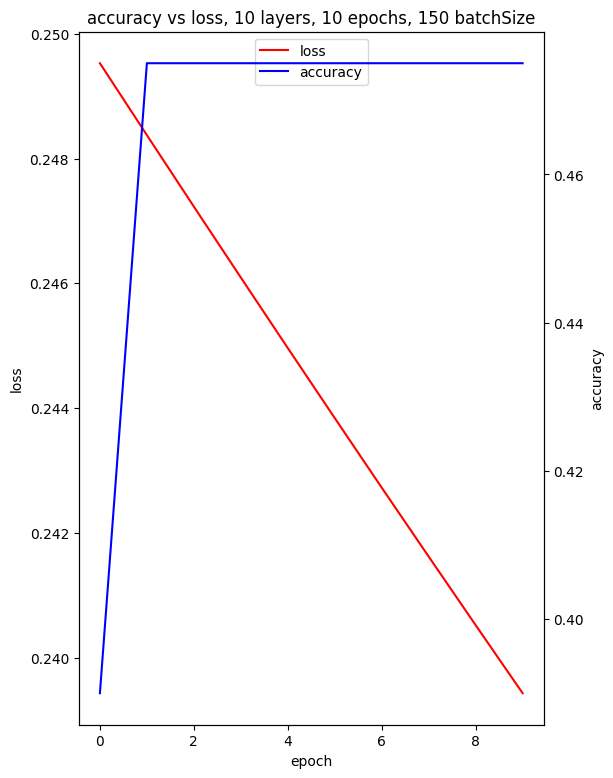

Epoch 1/20
20/20 [==============================] - 1s 13ms/step - loss: 0.2485 - accuracy: 0.4390
Epoch 2/20
20/20 [==============================] - 0s 13ms/step - loss: 0.2453 - accuracy: 0.4750
Epoch 3/20
20/20 [==============================] - 0s 13ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/20
20/20 [==============================] - 0s 13ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/20
20/20 [==============================] - 0s 13ms/step - loss: 0.2360 - accuracy: 0.4750
Epoch 6/20
20/20 [==============================] - 0s 13ms/step - loss: 0.2330 - accuracy: 0.4750
Epoch 7/20
20/20 [==============================] - 0s 13ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/20
20/20 [==============================] - 0s 17ms/step - loss: 0.2272 - accuracy: 0.4750
Epoch 9/20
20/20 [==============================] - 0s 16ms/step - loss: 0.2244 - accuracy: 0.4750
Epoch 10/20
20/20 [==============================] - 0s 15ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/

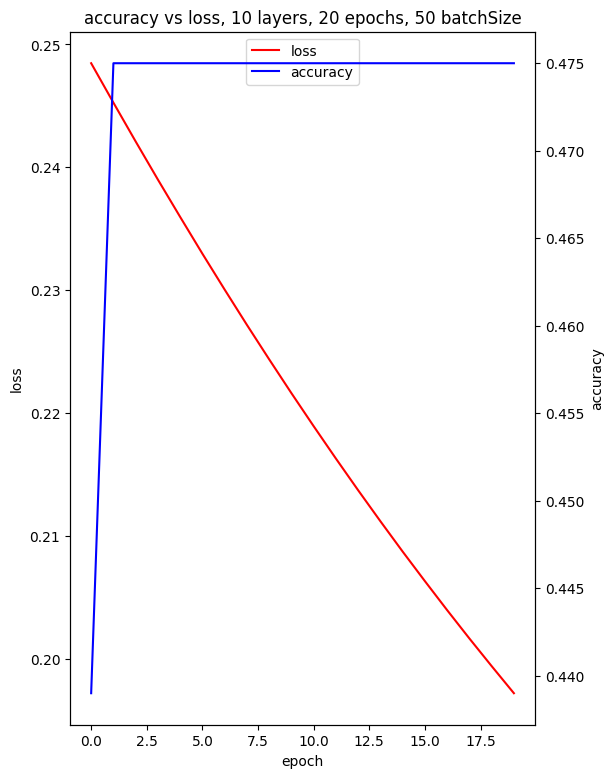

Epoch 1/20
10/10 [==============================] - 1s 15ms/step - loss: 0.2493 - accuracy: 0.4390
Epoch 2/20
10/10 [==============================] - 0s 14ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/20
10/10 [==============================] - 0s 14ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/20
10/10 [==============================] - 0s 13ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/20
10/10 [==============================] - 0s 13ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/20
10/10 [==============================] - 0s 14ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/20
10/10 [==============================] - 0s 13ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/20
10/10 [==============================] - 0s 13ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/20
10/10 [==============================] - 0s 14ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/20
10/10 [==============================] - 0s 14ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

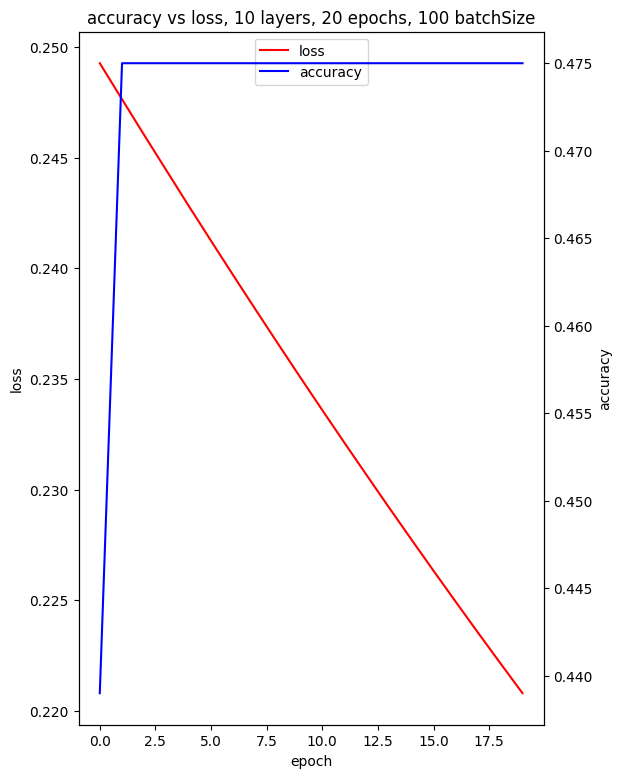

Epoch 1/20
7/7 [==============================] - 1s 16ms/step - loss: 0.2495 - accuracy: 0.4590
Epoch 2/20
7/7 [==============================] - 0s 14ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/20
7/7 [==============================] - 0s 14ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/20
7/7 [============

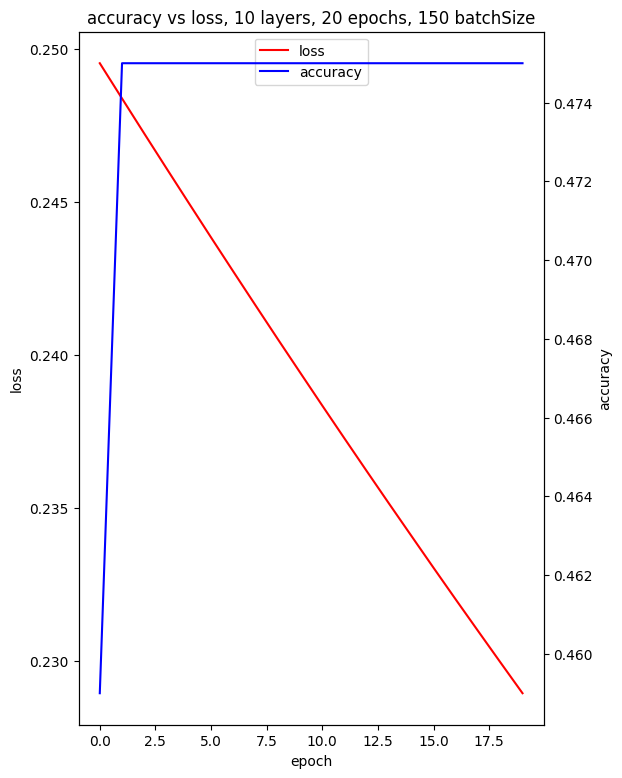

Epoch 1/30
20/20 [==============================] - 1s 15ms/step - loss: 0.2485 - accuracy: 0.4520
Epoch 2/30
20/20 [==============================] - 0s 13ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/30
20/20 [==============================] - 0s 13ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/30
20/20 [==============================] - 0s 13ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/30
20/20 [==============================] - 0s 16ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/30
20/20 [==============================] - 0s 15ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/30
20/20 [==============================] - 0s 13ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/30
20/20 [==============================] - 0s 13ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/30
20/20 [==============================] - 0s 14ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/30
20/20 [==============================] - 0s 14ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/

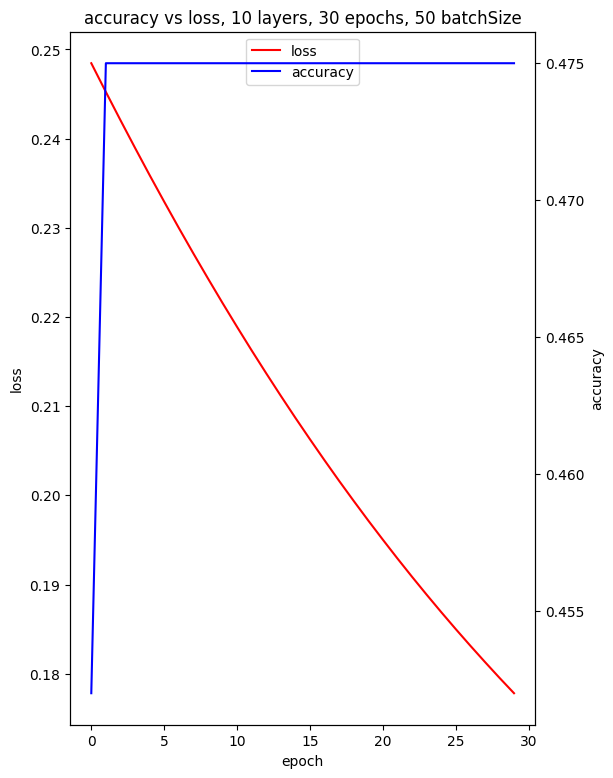

Epoch 1/30
10/10 [==============================] - 1s 15ms/step - loss: 0.2493 - accuracy: 0.4630
Epoch 2/30
10/10 [==============================] - 0s 13ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/30
10/10 [==============================] - 0s 13ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/30
10/10 [==============================] - 0s 13ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/30
10/10 [==============================] - 0s 13ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/30
10/10 [==============================] - 0s 14ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/30
10/10 [==============================] - 0s 13ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/30
10/10 [==============================] - 0s 13ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/30
10/10 [==============================] - 0s 13ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/30
10/10 [==============================] - 0s 13ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

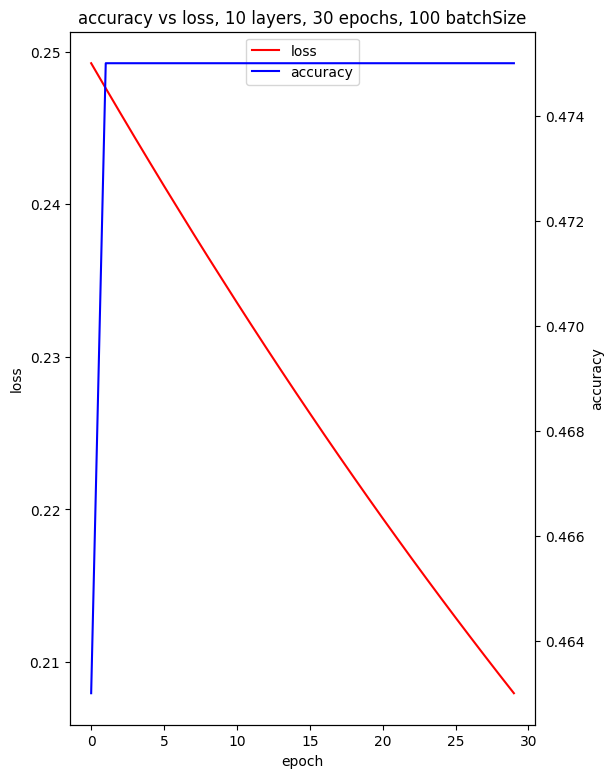

Epoch 1/30
7/7 [==============================] - 1s 17ms/step - loss: 0.2495 - accuracy: 0.4350
Epoch 2/30
7/7 [==============================] - 0s 15ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/30
7/7 [==============================] - 0s 15ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/30
7/7 [==============================] - 0s 14ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/30
7/7 [==============================] - 0s 22ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/30
7/7 [==============================] - 0s 15ms/step - loss: 0.2439 - accuracy: 0.4750
Epoch 7/30
7/7 [==============================] - 0s 15ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/30
7/7 [==============================] - 0s 16ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/30
7/7 [==============================] - 0s 17ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/30
7/7 [==============================] - 0s 16ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/30
7/7 [============

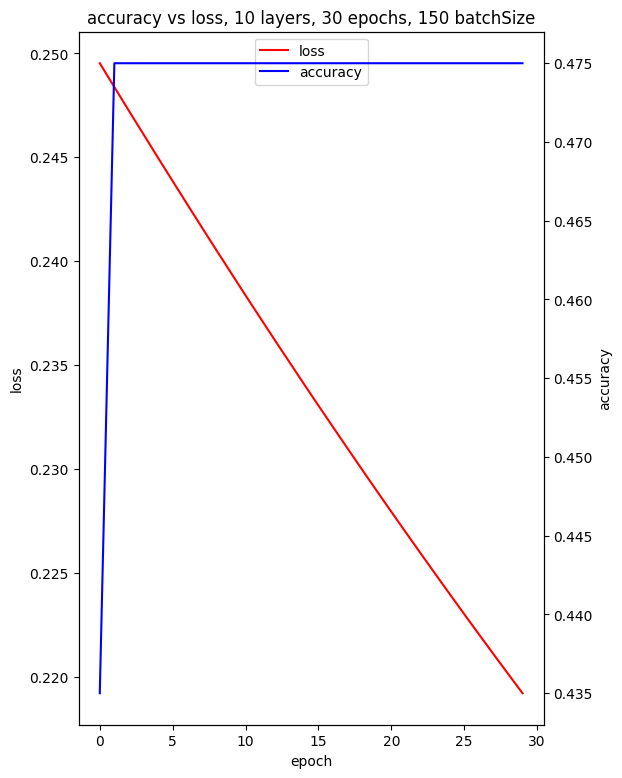

Epoch 1/10
20/20 [==============================] - 1s 16ms/step - loss: 0.2485 - accuracy: 0.4730
Epoch 2/10
20/20 [==============================] - 0s 16ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/10
20/20 [==============================] - 0s 16ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/10
20/20 [==============================] - 0s 15ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/10
20/20 [==============================] - 0s 15ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/10
20/20 [==============================] - 0s 16ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/10
20/20 [==============================] - 0s 16ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/10
20/20 [==============================] - 0s 17ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/10
20/20 [==============================] - 0s 16ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/10
20/20 [==============================] - 0s 15ms/step - loss: 0.2216 - accuracy: 0.4750


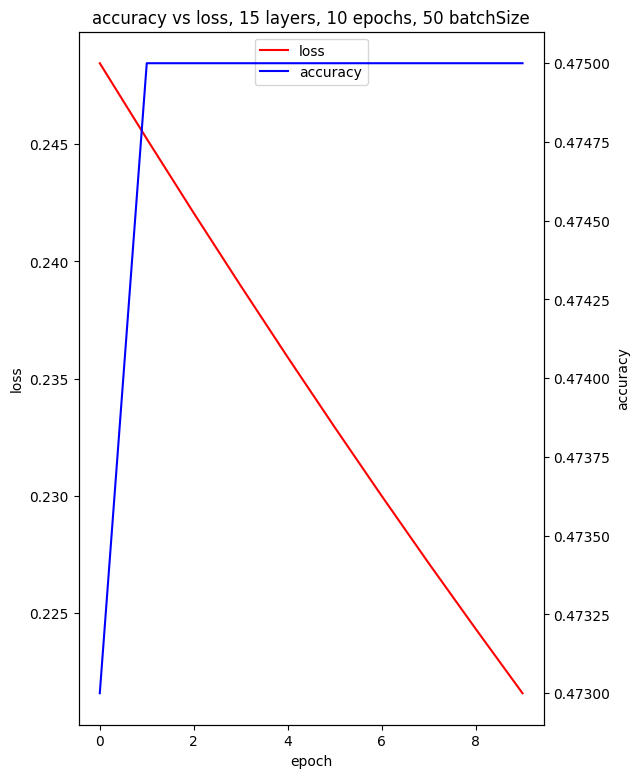

Epoch 1/10
10/10 [==============================] - 1s 18ms/step - loss: 0.2493 - accuracy: 0.4620
Epoch 2/10
10/10 [==============================] - 0s 16ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/10
10/10 [==============================] - 0s 16ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/10
10/10 [==============================] - 0s 16ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/10
10/10 [==============================] - 0s 16ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/10
10/10 [==============================] - 0s 17ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/10
10/10 [==============================] - 0s 19ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/10
10/10 [==============================] - 0s 20ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/10
10/10 [==============================] - 0s 19ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/10
10/10 [==============================] - 0s 18ms/step - loss: 0.2351 - accuracy: 0.4750


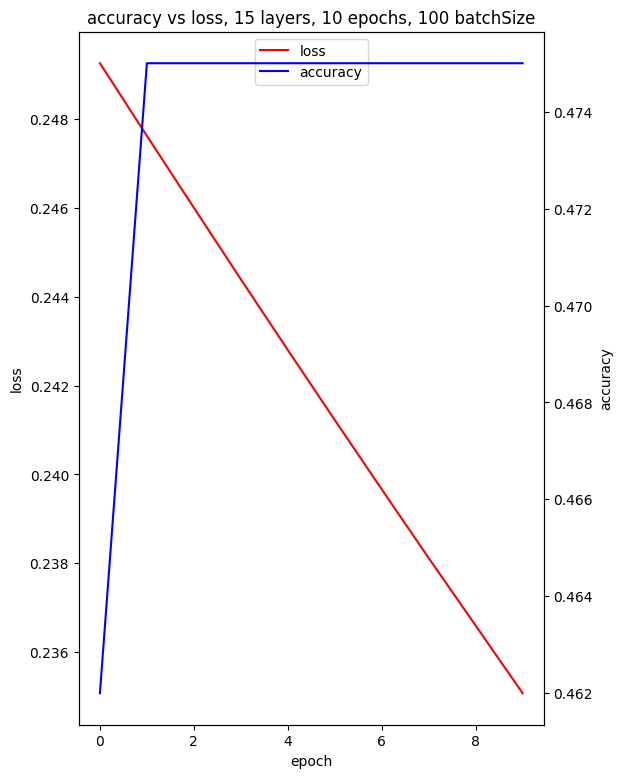

Epoch 1/10
7/7 [==============================] - 2s 44ms/step - loss: 0.2495 - accuracy: 0.4610
Epoch 2/10
7/7 [==============================] - 0s 41ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/10
7/7 [==============================] - 0s 29ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/10
7/7 [==============================] - 0s 32ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/10
7/7 [==============================] - 0s 38ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/10
7/7 [==============================] - 0s 43ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/10
7/7 [==============================] - 0s 30ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/10
7/7 [==============================] - 0s 35ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/10
7/7 [==============================] - 0s 22ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/10
7/7 [==============================] - 0s 27ms/step - loss: 0.2394 - accuracy: 0.4750


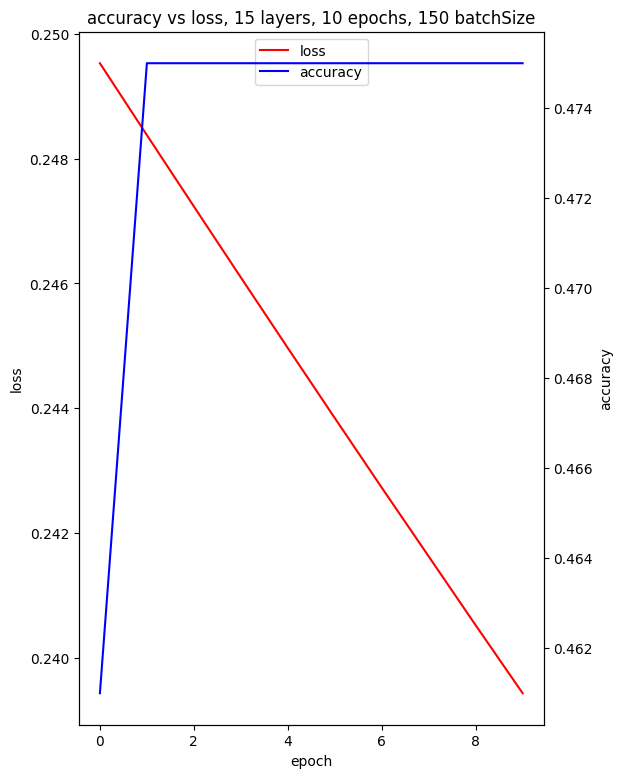

Epoch 1/20
20/20 [==============================] - 2s 33ms/step - loss: 0.2484 - accuracy: 0.4690
Epoch 2/20
20/20 [==============================] - 0s 16ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/20
20/20 [==============================] - 0s 23ms/step - loss: 0.2420 - accuracy: 0.4750
Epoch 4/20
20/20 [==============================] - 0s 16ms/step - loss: 0.2389 - accuracy: 0.4750
Epoch 5/20
20/20 [==============================] - 0s 15ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/20
20/20 [==============================] - 0s 17ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/20
20/20 [==============================] - 0s 16ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/20
20/20 [==============================] - 0s 17ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/20
20/20 [==============================] - 0s 17ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/20
20/20 [==============================] - 0s 15ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/

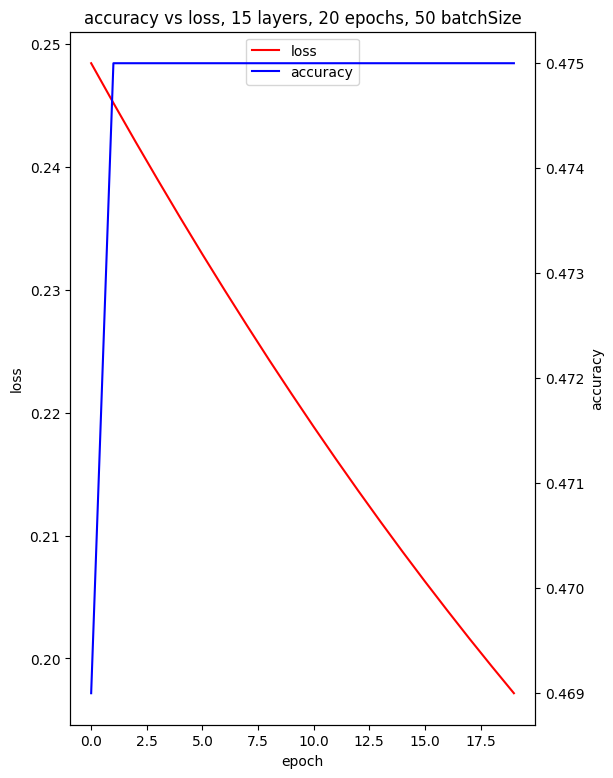

Epoch 1/20
10/10 [==============================] - 1s 18ms/step - loss: 0.2493 - accuracy: 0.4570
Epoch 2/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/20
10/10 [==============================] - 0s 15ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/20
10/10 [==============================] - 0s 28ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/20
10/10 [==============================] - 0s 17ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/20
10/10 [==============================] - 0s 16ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/20
10/10 [==============================] - 0s 16ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/20
10/10 [==============================] - 0s 16ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/20
10/10 [==============================] - 0s 15ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

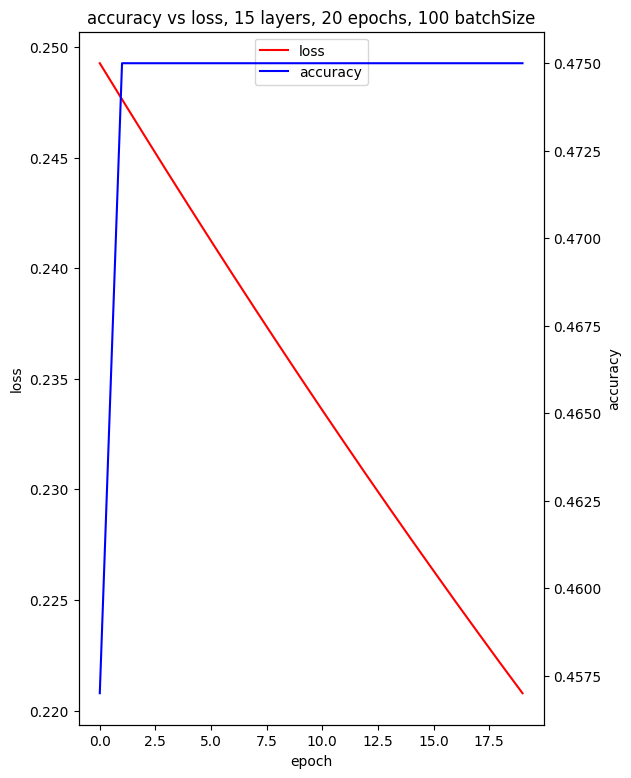

Epoch 1/20
7/7 [==============================] - 1s 50ms/step - loss: 0.2495 - accuracy: 0.4550
Epoch 2/20
7/7 [==============================] - 0s 33ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/20
7/7 [==============================] - 0s 40ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/20
7/7 [==============================] - 0s 24ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/20
7/7 [==============================] - 0s 37ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/20
7/7 [==============================] - 0s 40ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/20
7/7 [==============================] - 0s 39ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/20
7/7 [==============================] - 0s 32ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/20
7/7 [==============================] - 0s 27ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/20
7/7 [==============================] - 0s 30ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/20
7/7 [============

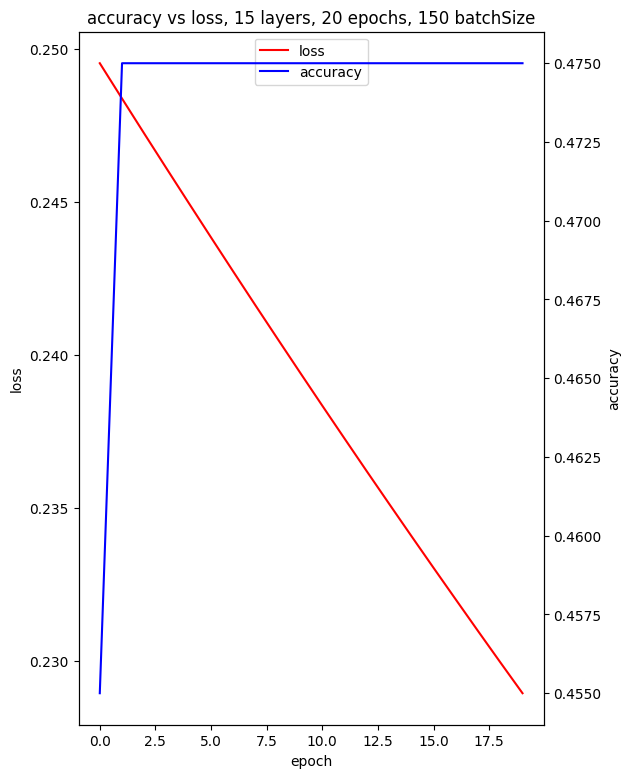

Epoch 1/30
20/20 [==============================] - 2s 25ms/step - loss: 0.2485 - accuracy: 0.4490
Epoch 2/30
20/20 [==============================] - 1s 25ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/30
20/20 [==============================] - 0s 21ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/30
20/20 [==============================] - 0s 16ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/30
20/20 [==============================] - 0s 21ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/30
20/20 [==============================] - 0s 14ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/30
20/20 [==============================] - 0s 15ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/30
20/20 [==============================] - 0s 23ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/30
20/20 [==============================] - 0s 21ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/30
20/20 [==============================] - 0s 20ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/

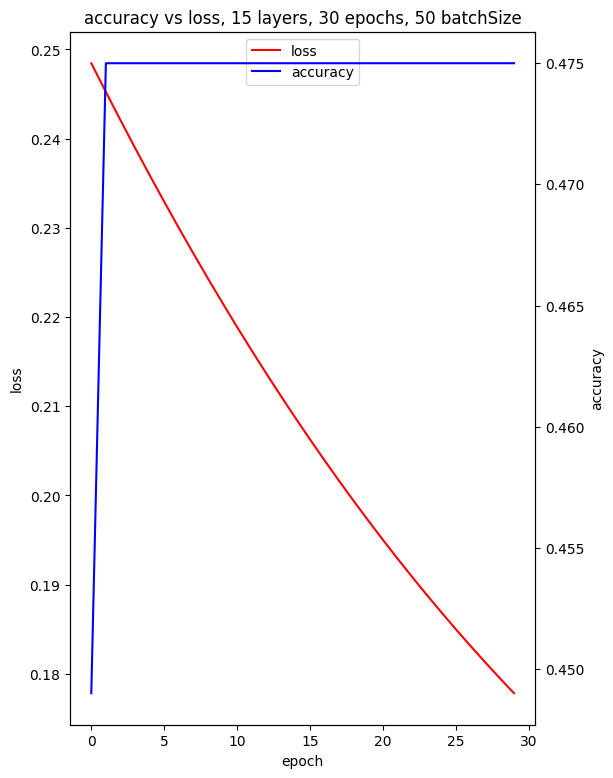

Epoch 1/30
10/10 [==============================] - 1s 18ms/step - loss: 0.2493 - accuracy: 0.4550
Epoch 2/30
10/10 [==============================] - 0s 16ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/30
10/10 [==============================] - 0s 16ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/30
10/10 [==============================] - 0s 15ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/30
10/10 [==============================] - 0s 16ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/30
10/10 [==============================] - 0s 16ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/30
10/10 [==============================] - 0s 16ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/30
10/10 [==============================] - 0s 16ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/30
10/10 [==============================] - 0s 15ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/30
10/10 [==============================] - 0s 18ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

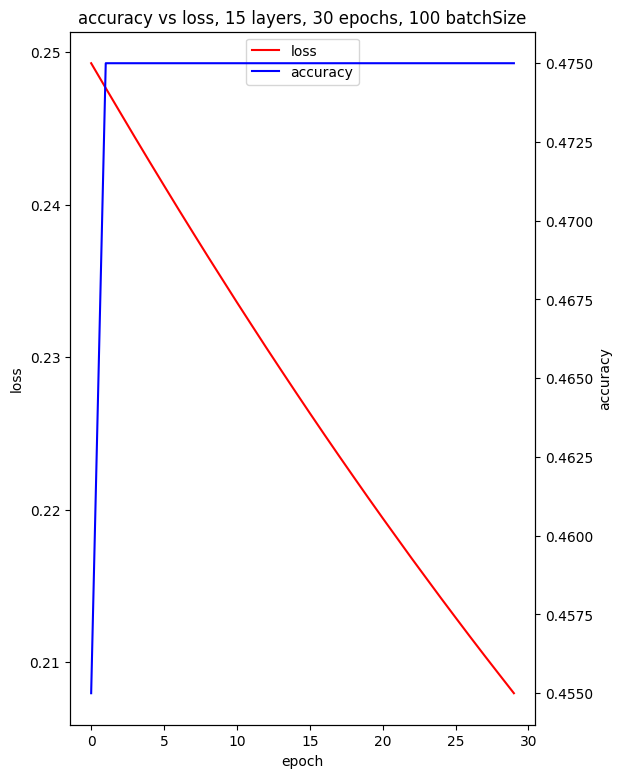

Epoch 1/30
7/7 [==============================] - 1s 18ms/step - loss: 0.2495 - accuracy: 0.4230
Epoch 2/30
7/7 [==============================] - 0s 16ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/30
7/7 [==============================] - 0s 16ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/30
7/7 [==============================] - 0s 16ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/30
7/7 [==============================] - 0s 17ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/30
7/7 [==============================] - 0s 21ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/30
7/7 [==============================] - 0s 22ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/30
7/7 [==============================] - 0s 20ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/30
7/7 [==============================] - 0s 26ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/30
7/7 [==============================] - 0s 23ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/30
7/7 [============

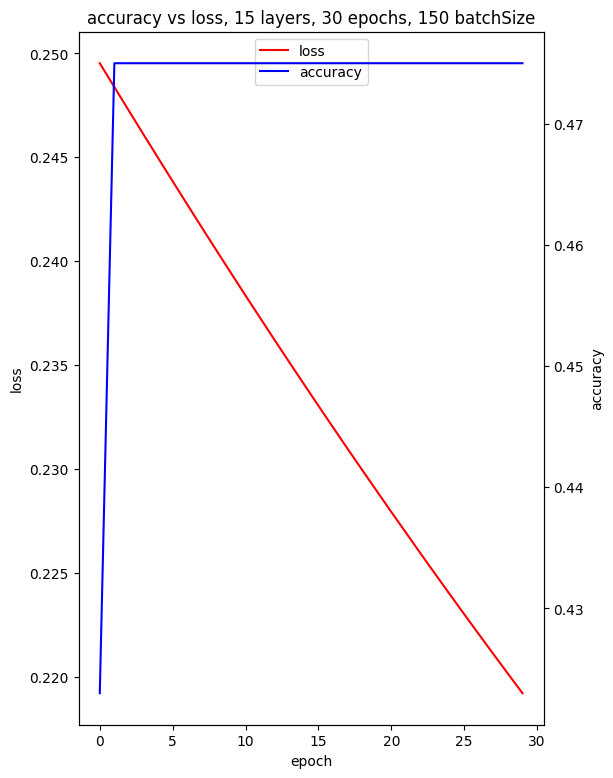

Epoch 1/10
20/20 [==============================] - 3s 41ms/step - loss: 0.2485 - accuracy: 0.4580
Epoch 2/10
20/20 [==============================] - 1s 30ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/10
20/20 [==============================] - 1s 32ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/10
20/20 [==============================] - 1s 31ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/10
20/20 [==============================] - 1s 23ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/10
20/20 [==============================] - 0s 19ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/10
20/20 [==============================] - 0s 19ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/10
20/20 [==============================] - 0s 19ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/10
20/20 [==============================] - 0s 22ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/10
20/20 [==============================] - 0s 20ms/step - loss: 0.2216 - accuracy: 0.4750


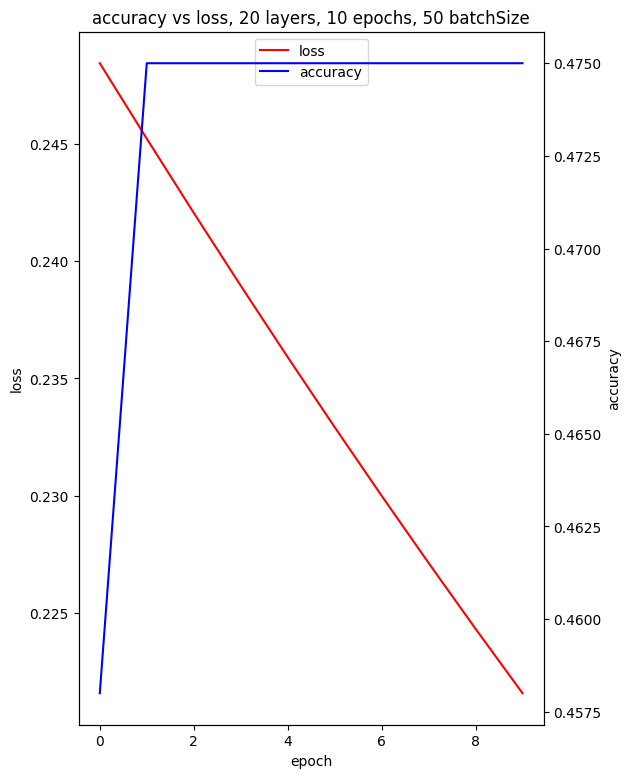

Epoch 1/10
10/10 [==============================] - 1s 21ms/step - loss: 0.2493 - accuracy: 0.4740
Epoch 2/10
10/10 [==============================] - 0s 20ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/10
10/10 [==============================] - 0s 27ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/10
10/10 [==============================] - 0s 32ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/10
10/10 [==============================] - 0s 26ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/10
10/10 [==============================] - 0s 27ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/10
10/10 [==============================] - 0s 22ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/10
10/10 [==============================] - 0s 30ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/10
10/10 [==============================] - 0s 30ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/10
10/10 [==============================] - 0s 25ms/step - loss: 0.2351 - accuracy: 0.4750


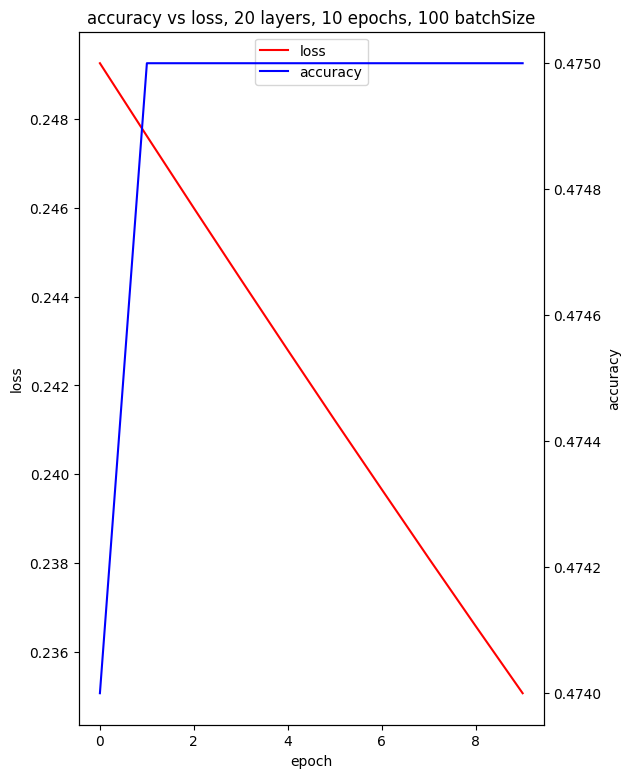

Epoch 1/10
7/7 [==============================] - 2s 23ms/step - loss: 0.2495 - accuracy: 0.4470
Epoch 2/10
7/7 [==============================] - 0s 24ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/10
7/7 [==============================] - 0s 23ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/10
7/7 [==============================] - 0s 22ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/10
7/7 [==============================] - 0s 21ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/10
7/7 [==============================] - 0s 32ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/10
7/7 [==============================] - 0s 29ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/10
7/7 [==============================] - 0s 25ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/10
7/7 [==============================] - 0s 26ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/10
7/7 [==============================] - 0s 24ms/step - loss: 0.2394 - accuracy: 0.4750


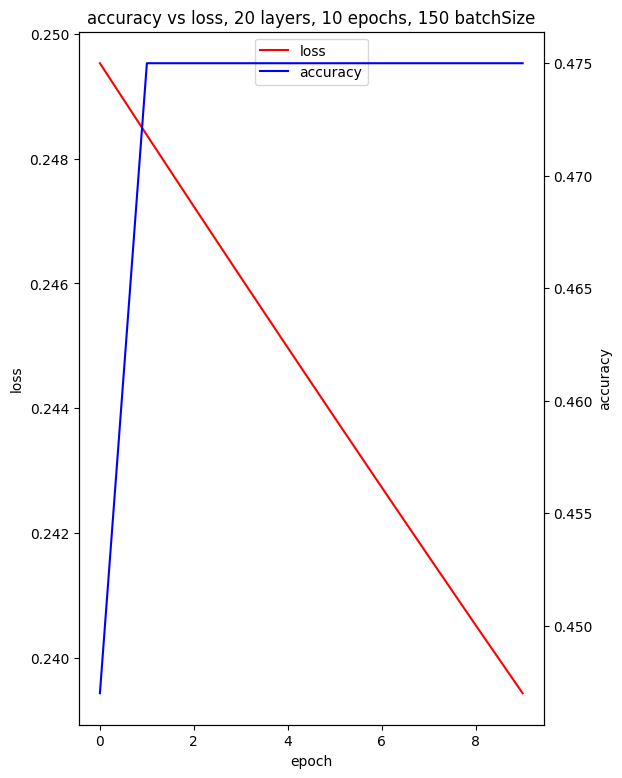

Epoch 1/20
20/20 [==============================] - 2s 20ms/step - loss: 0.2485 - accuracy: 0.4430
Epoch 2/20
20/20 [==============================] - 0s 19ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/20
20/20 [==============================] - 0s 21ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/20
20/20 [==============================] - 0s 20ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/20
20/20 [==============================] - 0s 20ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/20
20/20 [==============================] - 0s 19ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/20
20/20 [==============================] - 0s 18ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/20
20/20 [==============================] - 0s 20ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/20
20/20 [==============================] - 0s 18ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/20
20/20 [==============================] - 0s 19ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/

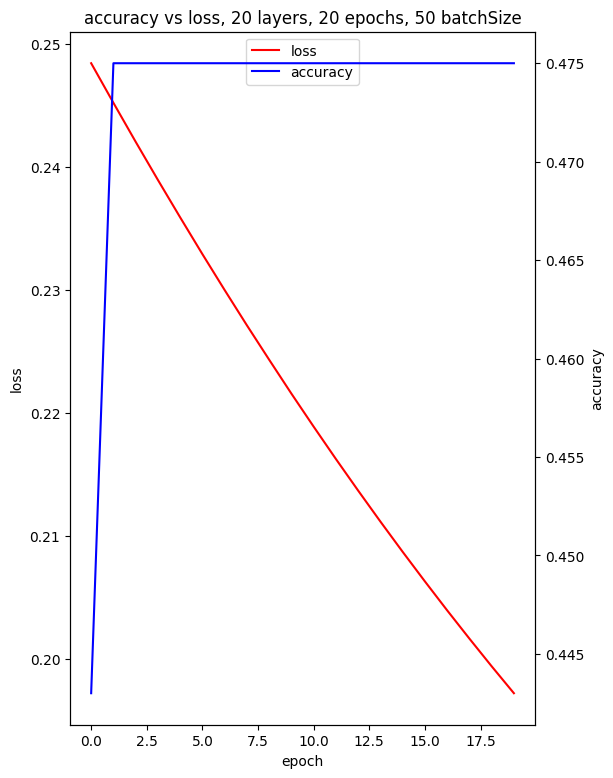

Epoch 1/20
10/10 [==============================] - 2s 19ms/step - loss: 0.2493 - accuracy: 0.4160
Epoch 2/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/20
10/10 [==============================] - 0s 19ms/step - loss: 0.2413 - accuracy: 0.4750
Epoch 7/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/20
10/10 [==============================] - 0s 26ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/20
10/10 [==============================] - 0s 25ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/20
10/10 [==============================] - 0s 21ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

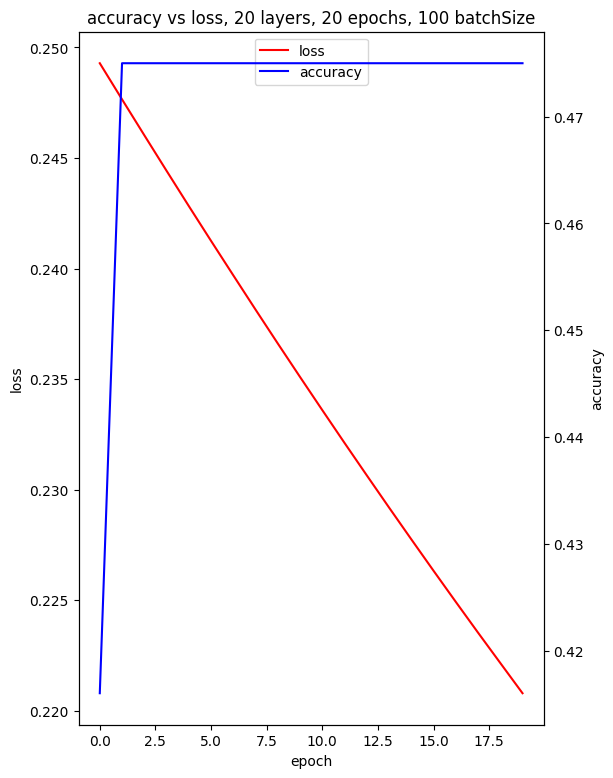

Epoch 1/20
7/7 [==============================] - 1s 23ms/step - loss: 0.2495 - accuracy: 0.4370
Epoch 2/20
7/7 [==============================] - 0s 21ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/20
7/7 [==============================] - 0s 19ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/20
7/7 [==============================] - 0s 21ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/20
7/7 [==============================] - 0s 23ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/20
7/7 [==============================] - 0s 32ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/20
7/7 [==============================] - 0s 25ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/20
7/7 [============

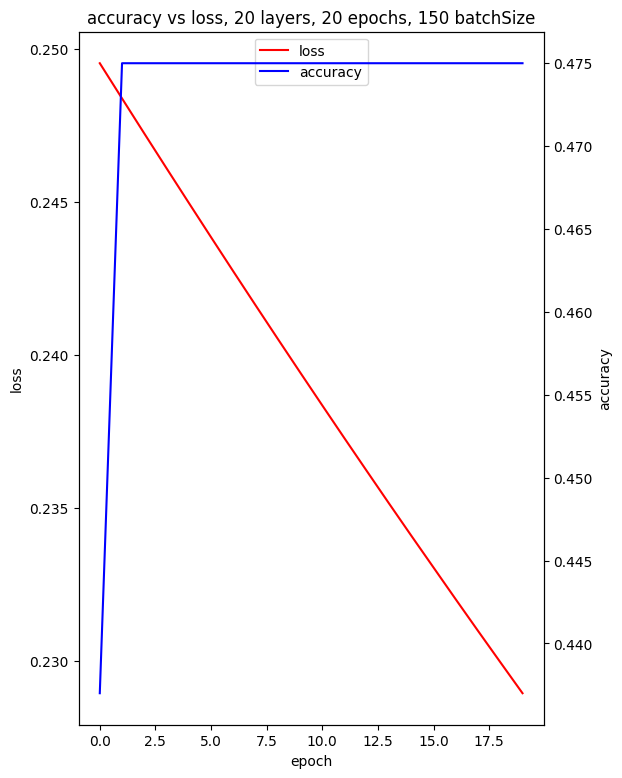

Epoch 1/30
20/20 [==============================] - 1s 19ms/step - loss: 0.2485 - accuracy: 0.4700
Epoch 2/30
20/20 [==============================] - 0s 17ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/30
20/20 [==============================] - 0s 17ms/step - loss: 0.2420 - accuracy: 0.4750
Epoch 4/30
20/20 [==============================] - 0s 17ms/step - loss: 0.2389 - accuracy: 0.4750
Epoch 5/30
20/20 [==============================] - 0s 17ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/30
20/20 [==============================] - 0s 17ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/30
20/20 [==============================] - 0s 18ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/30
20/20 [==============================] - 0s 19ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/30
20/20 [==============================] - 0s 18ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/30
20/20 [==============================] - 0s 18ms/step - loss: 0.2215 - accuracy: 0.4750
Epoch 11/

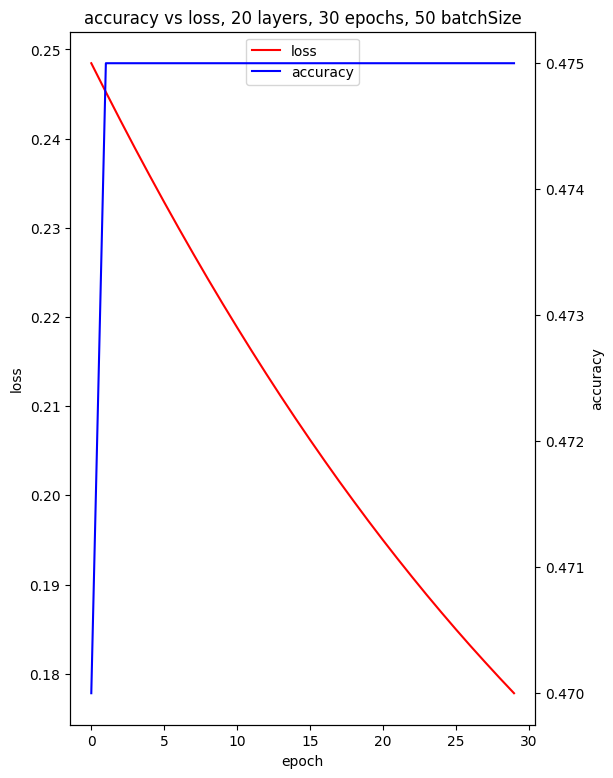

Epoch 1/30
10/10 [==============================] - 2s 19ms/step - loss: 0.2493 - accuracy: 0.4630
Epoch 2/30
10/10 [==============================] - 0s 20ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/30
10/10 [==============================] - 0s 21ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/30
10/10 [==============================] - 0s 21ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/30
10/10 [==============================] - 0s 18ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/30
10/10 [==============================] - 0s 20ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/30
10/10 [==============================] - 0s 21ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/30
10/10 [==============================] - 0s 22ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/30
10/10 [==============================] - 0s 18ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/30
10/10 [==============================] - 0s 19ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

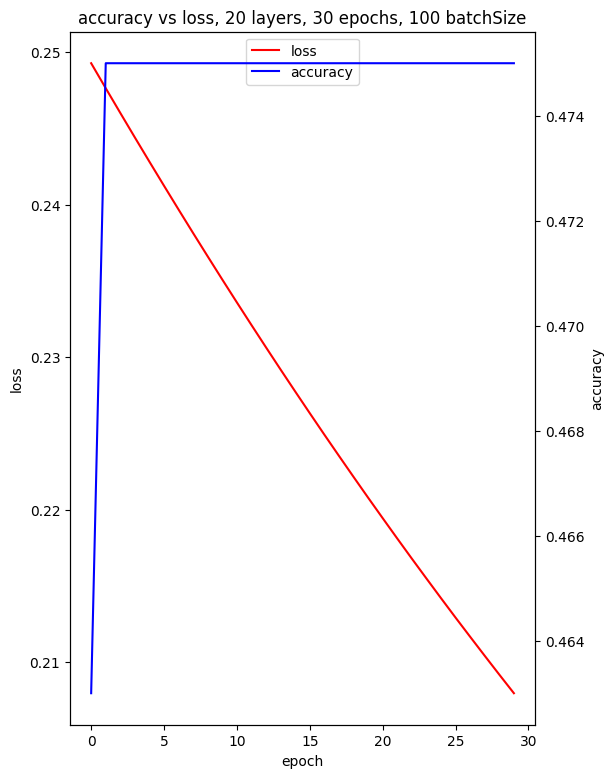

Epoch 1/30
7/7 [==============================] - 1s 26ms/step - loss: 0.2495 - accuracy: 0.4420
Epoch 2/30
7/7 [==============================] - 0s 20ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/30
7/7 [==============================] - 0s 20ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/30
7/7 [==============================] - 0s 19ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/30
7/7 [==============================] - 0s 19ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/30
7/7 [==============================] - 0s 20ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/30
7/7 [==============================] - 0s 21ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/30
7/7 [==============================] - 0s 28ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/30
7/7 [==============================] - 0s 22ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/30
7/7 [============

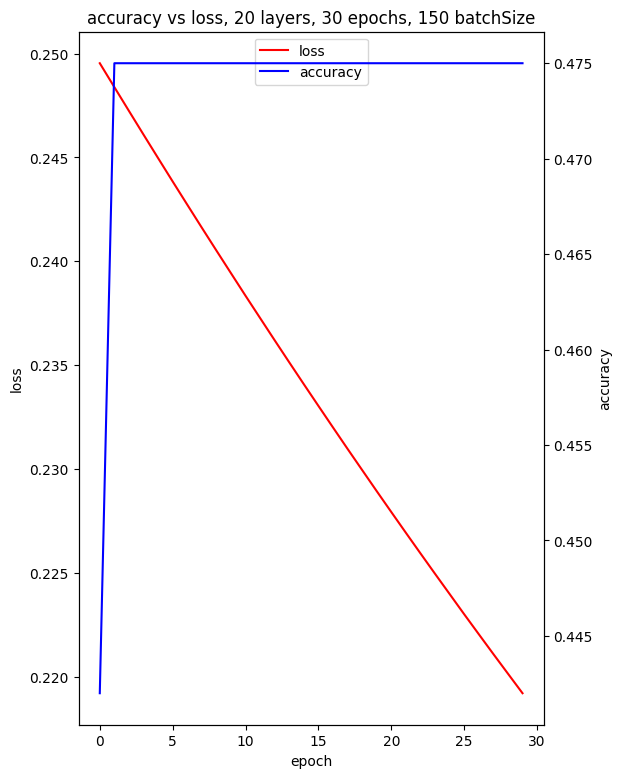

Epoch 1/10
20/20 [==============================] - 5s 51ms/step - loss: 0.2485 - accuracy: 0.4560
Epoch 2/10
20/20 [==============================] - 1s 43ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/10
20/20 [==============================] - 1s 47ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/10
20/20 [==============================] - 1s 50ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/10
20/20 [==============================] - 1s 56ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/10
20/20 [==============================] - 1s 41ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/10
20/20 [==============================] - 1s 39ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/10
20/20 [==============================] - 1s 38ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/10
20/20 [==============================] - 1s 35ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/10
20/20 [==============================] - 1s 34ms/step - loss: 0.2216 - accuracy: 0.4750


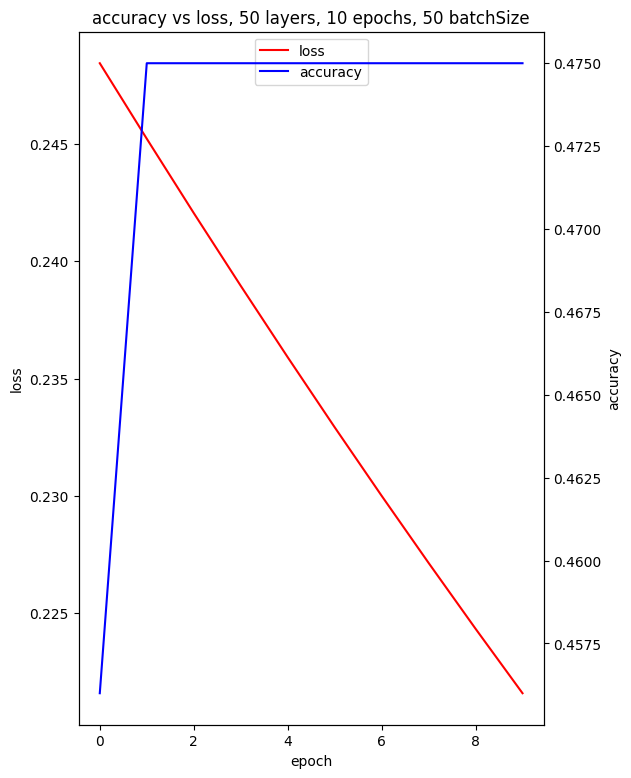

Epoch 1/10
10/10 [==============================] - 2s 40ms/step - loss: 0.2493 - accuracy: 0.4540
Epoch 2/10
10/10 [==============================] - 0s 39ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/10
10/10 [==============================] - 0s 42ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/10
10/10 [==============================] - 0s 37ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/10
10/10 [==============================] - 0s 36ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/10
10/10 [==============================] - 0s 40ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/10
10/10 [==============================] - 0s 37ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/10
10/10 [==============================] - 0s 40ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/10
10/10 [==============================] - 0s 39ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/10
10/10 [==============================] - 0s 37ms/step - loss: 0.2351 - accuracy: 0.4750


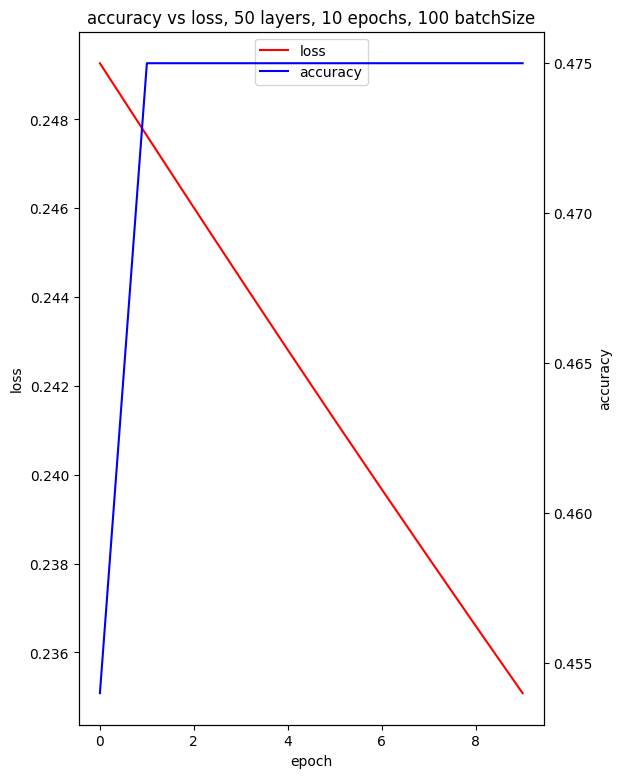

Epoch 1/10
7/7 [==============================] - 3s 49ms/step - loss: 0.2495 - accuracy: 0.4430
Epoch 2/10
7/7 [==============================] - 0s 45ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/10
7/7 [==============================] - 0s 42ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/10
7/7 [==============================] - 0s 46ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/10
7/7 [==============================] - 0s 47ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/10
7/7 [==============================] - 0s 43ms/step - loss: 0.2439 - accuracy: 0.4750
Epoch 7/10
7/7 [==============================] - 0s 48ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/10
7/7 [==============================] - 0s 47ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/10
7/7 [==============================] - 0s 47ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/10
7/7 [==============================] - 0s 45ms/step - loss: 0.2394 - accuracy: 0.4750


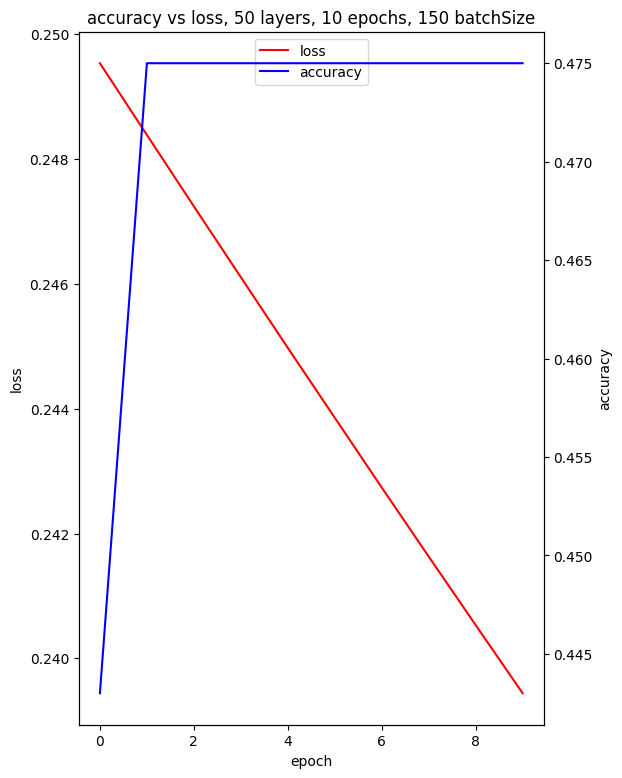

Epoch 1/20
20/20 [==============================] - 3s 33ms/step - loss: 0.2484 - accuracy: 0.4700
Epoch 2/20
20/20 [==============================] - 1s 50ms/step - loss: 0.2452 - accuracy: 0.4750
Epoch 3/20
20/20 [==============================] - 1s 38ms/step - loss: 0.2420 - accuracy: 0.4750
Epoch 4/20
20/20 [==============================] - 1s 36ms/step - loss: 0.2389 - accuracy: 0.4750
Epoch 5/20
20/20 [==============================] - 1s 36ms/step - loss: 0.2359 - accuracy: 0.4750
Epoch 6/20
20/20 [==============================] - 1s 36ms/step - loss: 0.2329 - accuracy: 0.4750
Epoch 7/20
20/20 [==============================] - 1s 37ms/step - loss: 0.2300 - accuracy: 0.4750
Epoch 8/20
20/20 [==============================] - 1s 38ms/step - loss: 0.2271 - accuracy: 0.4750
Epoch 9/20
20/20 [==============================] - 1s 36ms/step - loss: 0.2243 - accuracy: 0.4750
Epoch 10/20
20/20 [==============================] - 1s 35ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/

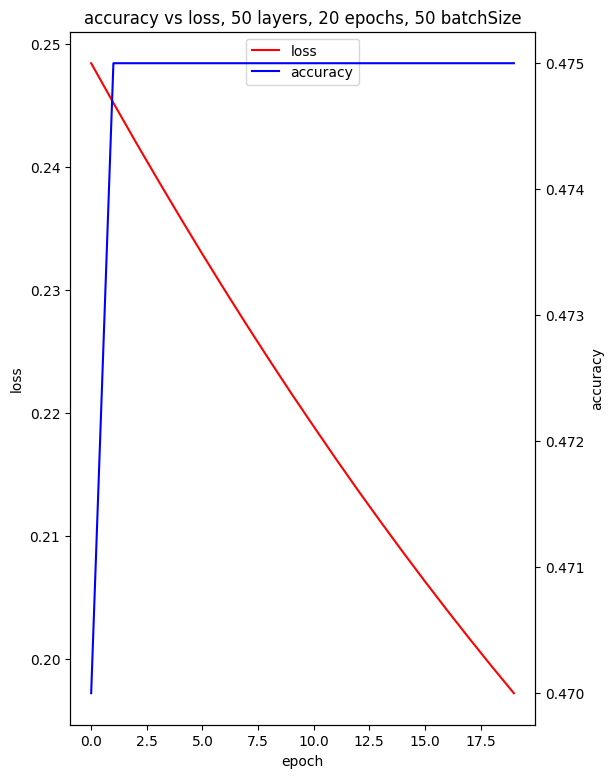

Epoch 1/20
10/10 [==============================] - 3s 43ms/step - loss: 0.2493 - accuracy: 0.4630
Epoch 2/20
10/10 [==============================] - 0s 43ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/20
10/10 [==============================] - 0s 39ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/20
10/10 [==============================] - 0s 40ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/20
10/10 [==============================] - 0s 43ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/20
10/10 [==============================] - 0s 40ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/20
10/10 [==============================] - 0s 40ms/step - loss: 0.2397 - accuracy: 0.4750
Epoch 8/20
10/10 [==============================] - 0s 37ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/20
10/10 [==============================] - 0s 38ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/20
10/10 [==============================] - 0s 38ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

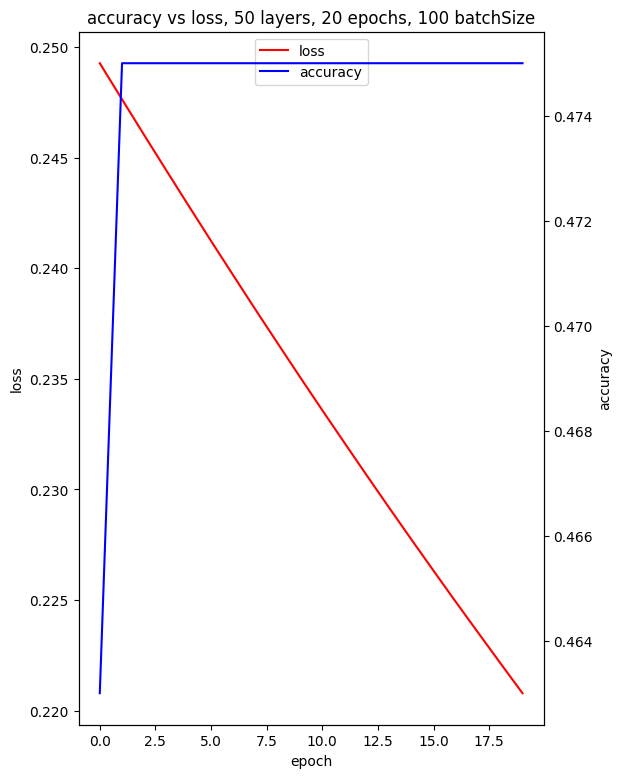

Epoch 1/20
7/7 [==============================] - 3s 45ms/step - loss: 0.2495 - accuracy: 0.4500
Epoch 2/20
7/7 [==============================] - 0s 42ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/20
7/7 [==============================] - 0s 44ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/20
7/7 [==============================] - 0s 45ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/20
7/7 [==============================] - 0s 44ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/20
7/7 [==============================] - 0s 43ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/20
7/7 [==============================] - 0s 44ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/20
7/7 [==============================] - 0s 43ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/20
7/7 [==============================] - 0s 44ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/20
7/7 [==============================] - 0s 46ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/20
7/7 [============

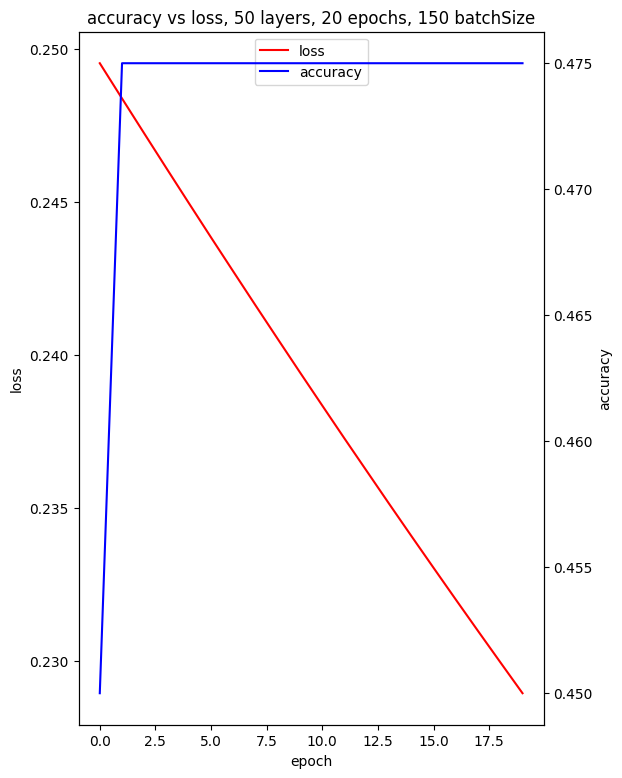

Epoch 1/30
20/20 [==============================] - 3s 34ms/step - loss: 0.2485 - accuracy: 0.4420
Epoch 2/30
20/20 [==============================] - 1s 38ms/step - loss: 0.2453 - accuracy: 0.4750
Epoch 3/30
20/20 [==============================] - 1s 36ms/step - loss: 0.2421 - accuracy: 0.4750
Epoch 4/30
20/20 [==============================] - 1s 33ms/step - loss: 0.2390 - accuracy: 0.4750
Epoch 5/30
20/20 [==============================] - 1s 33ms/step - loss: 0.2360 - accuracy: 0.4750
Epoch 6/30
20/20 [==============================] - 1s 36ms/step - loss: 0.2330 - accuracy: 0.4750
Epoch 7/30
20/20 [==============================] - 1s 34ms/step - loss: 0.2301 - accuracy: 0.4750
Epoch 8/30
20/20 [==============================] - 1s 35ms/step - loss: 0.2272 - accuracy: 0.4750
Epoch 9/30
20/20 [==============================] - 1s 35ms/step - loss: 0.2244 - accuracy: 0.4750
Epoch 10/30
20/20 [==============================] - 1s 34ms/step - loss: 0.2216 - accuracy: 0.4750
Epoch 11/

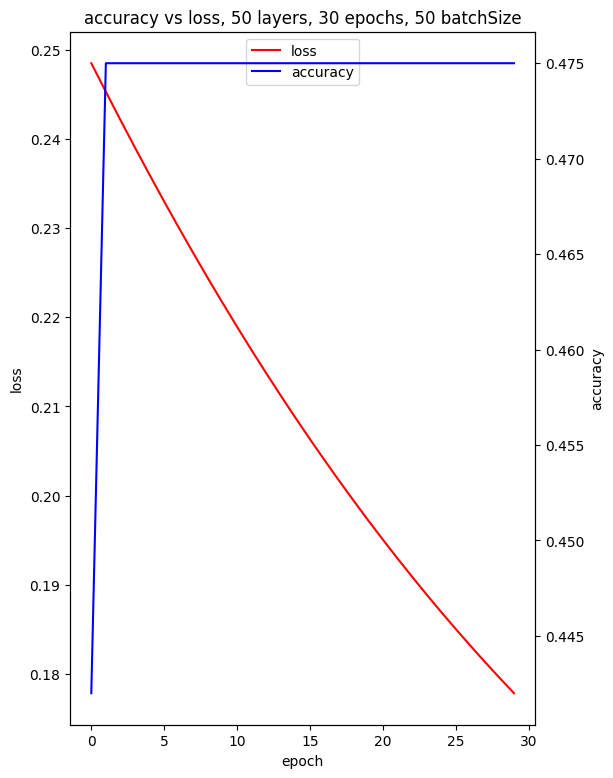

Epoch 1/30
10/10 [==============================] - 3s 39ms/step - loss: 0.2493 - accuracy: 0.4670
Epoch 2/30
10/10 [==============================] - 0s 37ms/step - loss: 0.2476 - accuracy: 0.4750
Epoch 3/30
10/10 [==============================] - 0s 40ms/step - loss: 0.2460 - accuracy: 0.4750
Epoch 4/30
10/10 [==============================] - 0s 38ms/step - loss: 0.2444 - accuracy: 0.4750
Epoch 5/30
10/10 [==============================] - 0s 40ms/step - loss: 0.2428 - accuracy: 0.4750
Epoch 6/30
10/10 [==============================] - 0s 39ms/step - loss: 0.2412 - accuracy: 0.4750
Epoch 7/30
10/10 [==============================] - 0s 40ms/step - loss: 0.2396 - accuracy: 0.4750
Epoch 8/30
10/10 [==============================] - 0s 40ms/step - loss: 0.2381 - accuracy: 0.4750
Epoch 9/30
10/10 [==============================] - 0s 39ms/step - loss: 0.2366 - accuracy: 0.4750
Epoch 10/30
10/10 [==============================] - 0s 41ms/step - loss: 0.2351 - accuracy: 0.4750
Epoch 11/

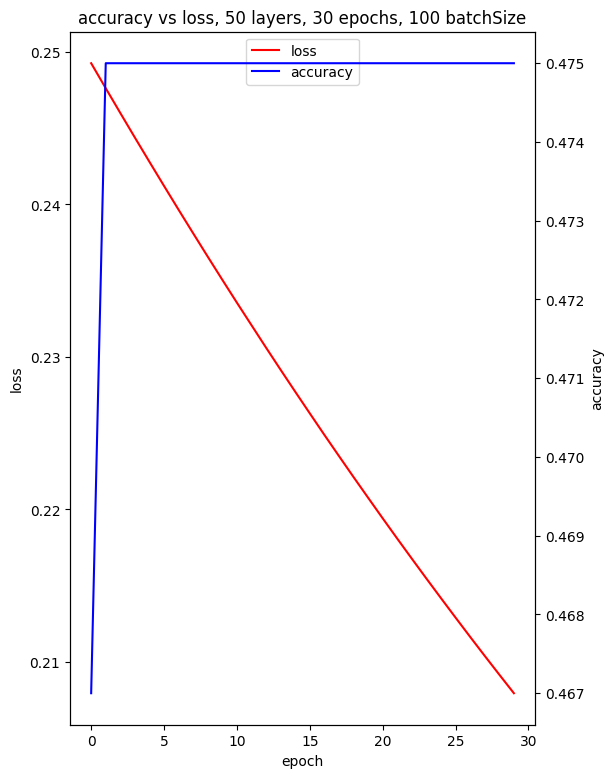

Epoch 1/30
7/7 [==============================] - 3s 44ms/step - loss: 0.2495 - accuracy: 0.4520
Epoch 2/30
7/7 [==============================] - 0s 44ms/step - loss: 0.2484 - accuracy: 0.4750
Epoch 3/30
7/7 [==============================] - 3s 570ms/step - loss: 0.2472 - accuracy: 0.4750
Epoch 4/30
7/7 [==============================] - 0s 46ms/step - loss: 0.2461 - accuracy: 0.4750
Epoch 5/30
7/7 [==============================] - 0s 48ms/step - loss: 0.2450 - accuracy: 0.4750
Epoch 6/30
7/7 [==============================] - 0s 48ms/step - loss: 0.2438 - accuracy: 0.4750
Epoch 7/30
7/7 [==============================] - 0s 47ms/step - loss: 0.2427 - accuracy: 0.4750
Epoch 8/30
7/7 [==============================] - 0s 46ms/step - loss: 0.2416 - accuracy: 0.4750
Epoch 9/30
7/7 [==============================] - 0s 44ms/step - loss: 0.2405 - accuracy: 0.4750
Epoch 10/30
7/7 [==============================] - 0s 42ms/step - loss: 0.2394 - accuracy: 0.4750
Epoch 11/30
7/7 [===========

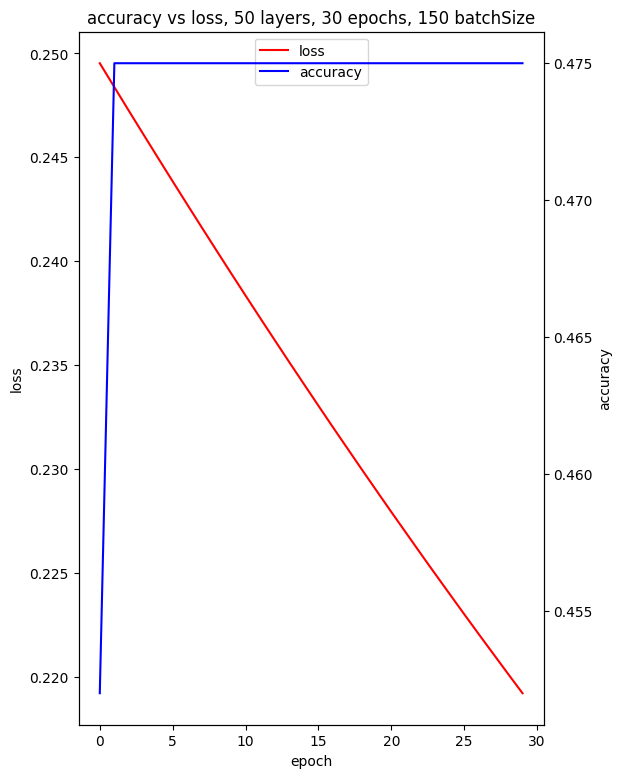

In [76]:
numberOfLayersToTest = [3, 7, 10, 15, 20, 50]
epochsToTest = [10, 20, 30]
batchSizesToTest = [50, 100, 150]
histories, models = trainModels(numberOfLayersToTest, epochsToTest, batchSizesToTest, x_vector, labels)

# doing the same on the full data set

In [82]:
full = data.copy() # don't want to change the data

In [91]:
Conditions_one_hot = pd.get_dummies(full.Conditions)
Conditions_one_hot

,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy"
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
439913,0,0,1,0,0,0
439914,0,1,0,0,0,0
439915,0,0,1,0,0,0
439916,0,0,0,0,0,0


In [93]:
labels = tf.convert_to_tensor(Conditions_one_hot, dtype = tf.float64)

In [84]:
full['Date time'] = pd.to_datetime(full['Date time'])
full['Date time'] = full['Date time'].apply(lambda x: x.timestamp())
full['Date time']

0         1.675210e+09
1         1.675213e+09
2         1.675217e+09
3         1.675220e+09
4         1.675224e+09
              ...     
439913    9.597240e+07
439914    9.597600e+07
439915    9.597960e+07
439916    9.598320e+07
439917    9.598680e+07
Name: Date time, Length: 439918, dtype: float64

In [85]:
full['Weather Type'] = full['Weather Type'].str.split(',')
full['Weather Type']

0                               [Thunderstorm]
1                               [Thunderstorm]
2                 [Mist,  Rain,  Thunderstorm]
3                  [Thunderstorm,  Light Rain]
4                        [Rain,  Thunderstorm]
                          ...                 
439913                                  [Rain]
439914          [Snow And Rain Showers,  Rain]
439915                                     NaN
439916                                     NaN
439917    [Snow And Rain Showers,  Light Rain]
Name: Weather Type, Length: 439918, dtype: object

In [86]:
df2 = full['Weather Type'].to_frame()
df2['Weather Type'] = df2['Weather Type'].apply(lambda d: d if isinstance(d, list) else [])
mlb = MultiLabelBinarizer()
df_transformed2 = pd.DataFrame(mlb.fit_transform(df['Weather Type']), columns=mlb.classes_, index=df.index)
df_transformed2.columns

Index([' Fog', ' Heavy Drizzle/Rain', ' Heavy Rain', ' Light Drizzle',
       ' Light Drizzle/Rain', ' Light Freezing Rain', ' Light Rain', ' Mist',
       ' Rain', ' Rain Showers', ' Sky Coverage Decreasing',
       ' Sky Coverage Increasing', ' Sky Unchanged', ' Smoke Or Haze', ' Snow',
       ' Thunderstorm', ' Thunderstorm Without Precipitation', 'Drizzle',
       'Hail Showers', 'Heavy Drizzle/Rain', 'Heavy Rain', 'Light Drizzle',
       'Light Drizzle/Rain', 'Light Rain', 'Lightning Without Thunder', 'Mist',
       'Rain', 'Rain Showers', 'Sky Coverage Decreasing',
       'Sky Coverage Increasing', 'Smoke Or Haze', 'Snow And Rain Showers',
       'Thunderstorm', 'Thunderstorm Without Precipitation'],
      dtype='object')

In [88]:
x_vector = pd.concat((full.drop(['Weather Type', 'Conditions'], axis=1),df_transformed2), axis=1)
x_vector

,Unnamed: 0,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Lightning Without Thunder,Mist,Rain,Rain Showers,Sky Coverage Decreasing,Sky Coverage Increasing,Smoke Or Haze,Snow And Rain Showers,Thunderstorm,Thunderstorm Without Precipitation
0,0,1.675210e+09,50.9,50.9,50.9,49.1,93.53,NaN,7.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.675213e+09,44.0,44.0,44.0,39.5,84.07,NaN,13.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1.675217e+09,44.7,44.7,44.7,39.9,82.97,NaN,10.1,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.675220e+09,44.7,44.7,44.7,39.9,82.95,NaN,14.3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,1.675224e+09,44.7,44.7,44.7,39.9,82.97,NaN,9.8,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439913,353,9.597240e+07,46.9,46.9,46.9,38.1,71.29,NaN,20.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439914,354,9.597600e+07,35.8,35.8,35.8,34.0,93.09,NaN,31.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439915,355,9.597960e+07,35.7,35.7,35.7,33.9,93.09,NaN,20.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439916,356,9.598320e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Epoch 1/10
8799/8799 [==============================] - 90s 10ms/step - loss: 0.1165 - accuracy: 0.5073
Epoch 2/10
8799/8799 [==============================] - 93s 11ms/step - loss: 0.0999 - accuracy: 0.5074
Epoch 3/10
8799/8799 [==============================] - 94s 11ms/step - loss: 0.0998 - accuracy: 0.5074
Epoch 4/10
8799/8799 [==============================] - 107s 12ms/step - loss: 0.0998 - accuracy: 0.5074
Epoch 5/10
8799/8799 [==============================] - 105s 12ms/step - loss: 0.0998 - accuracy: 0.5074
Epoch 6/10
8799/8799 [==============================] - 126s 14ms/step - loss: 0.0998 - accuracy: 0.5074
Epoch 7/10
8799/8799 [==============================] - 139s 16ms/step - loss: 0.0998 - accuracy: 0.5074
Epoch 8/10
8799/8799 [==============================] - 126s 14ms/step - loss: 0.0998 - accuracy: 0.5074
Epoch 9/10
8799/8799 [==============================] - 125s 14ms/step - loss: 0.0998 - accuracy: 0.5074
Epoch 10/10
8799/8799 [==============================] - 1

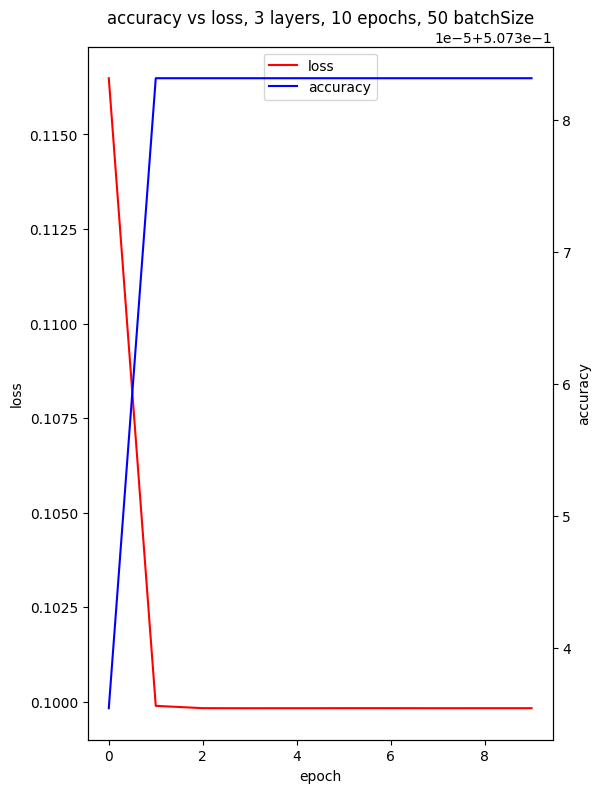

Epoch 1/10
4400/4400 [==============================] - 59s 13ms/step - loss: 0.1319 - accuracy: 0.5074
Epoch 2/10
4400/4400 [==============================] - 60s 14ms/step - loss: 0.1010 - accuracy: 0.5074
Epoch 3/10
3046/4400 [===================>..........] - ETA: 20s - loss: 0.1000 - accuracy: 0.5073

KeyboardInterrupt: 

In [94]:
numberOfLayersToTest = [3, 7, 10, 15, 20, 50]
epochsToTest = [10, 20, 30]
batchSizesToTest = [50, 100, 150]
histories, models = trainModels(numberOfLayersToTest, epochsToTest, batchSizesToTest, x_vector, labels)

# not in use yet

In [ ]:
def getTeamsStats(df, numOfRecords = 10):
    """
    gets stats for each team from the past 'numOfRecords' games, split into home / away statistics. relevant stats are the
    aggregated fields such as total / avg fields
    """
    lastAwayGames = pd.DataFrame(df[df['is_home_team'] == False].sort_values(['game_date'], ascending=False).groupby(['team_name']).head(numOfRecords))
    lastHomeGames = pd.DataFrame(df[df['is_home_team'] == True].sort_values(['game_date'], ascending=False).groupby(['team_name']).head(numOfRecords))
    fieldsToCalculate = [col for col in list(df.columns) if col.startswith('total') or col.startswith('avg')] + ['game_won']
    teamsStats = {teamName: {'home': dict(), 'away': dict()} for teamName in df.team_name.unique()}
    for colName in fieldsToCalculate:
        for teamName, mean in dict(lastHomeGames.groupby(['team_name'])[colName].mean()).items():
            teamsStats[teamName]['home'][f'{colName}_mean_home'] = mean
        for teamName, mean in dict(lastAwayGames.groupby(['team_name'])[colName].mean()).items():
            teamsStats[teamName]['away'][f'{colName}_mean_away'] = mean
    return teamsStats